# Lead Scoring Case Study

<b><font color = Blue>Problem Statement</font></b><br>
<p align="justify">An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.</p>
<p align="justify">The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.</p>
<p align="justify">X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.</p>

<b><font color = blue>Goals and Objective</font></b><br>
- <p align="justify">Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</p>
- <p align="justify">There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</p>

## <font color = 'red'>Step 1 : Reading and understanding the dataset (Leads.csv)</font>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd

In [3]:
# importing dataset 'Leads.csv'
leads_df = pd.read_csv('Leads.csv')
leads_df_original = leads_df.copy()
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Inspecting the various aspects of the data dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## <font color = 'red'>Step 2 : Data Cleaning</font>

In [6]:
# Checking for duplicates
leads_df.loc[leads_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### <font color = 'maroon'>Observations:</font>
No duplicates in the data!

In [7]:
# Checking for duplicates in the columns
print(sum(leads_df.duplicated(subset = 'Lead Number')))
print(sum(leads_df.duplicated(subset = 'Prospect ID')))

0
0


### <font color = 'maroon'>Observations:</font>
As the values in these columns are different for each entry/row, there are just indicative of the ID and are not important from an analysis point of view. Hence, they can be dropped.

In [8]:
leads_df = leads_df.drop(['Lead Number','Prospect ID'],1)

## Step 2.1 : Treating "Select" value

'Select' seems to be the default value stored in the backend for columns that are optional in nature and the prospective lead has chosen not to select any of options available in the dropdown menu.

In [9]:
# Converting 'Select' values to NaN
leads_df = leads_df.replace('Select', np.nan)

In [10]:
# Getting percentage of null values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### <font color = 'maroon'>Observations:</font>
We'll drop columns with more than 50% of missing values as it does not make sense to impute these many values. But the variable 'Lead Quality', which has 51.6% missing values seems to be related to my goal of the problem statement. So we'll not drop that column for now.

In [11]:
# Droping columns with more than 50% of missing values 
leads_df = leads_df.drop(leads_df.loc[:,list(round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)>52)].columns, 1)

In [12]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Step 2.2 : Working on other columns

- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots.

In [13]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [14]:
# Function for percentage plots
def percent_plot(var):
    values = (leads_df[var].value_counts(normalize=True)*100)
    plt_perc = values.plot.bar(color=sns.color_palette('deep'))
    plt_perc.set(xlabel = var, ylabel = '% in dataset')

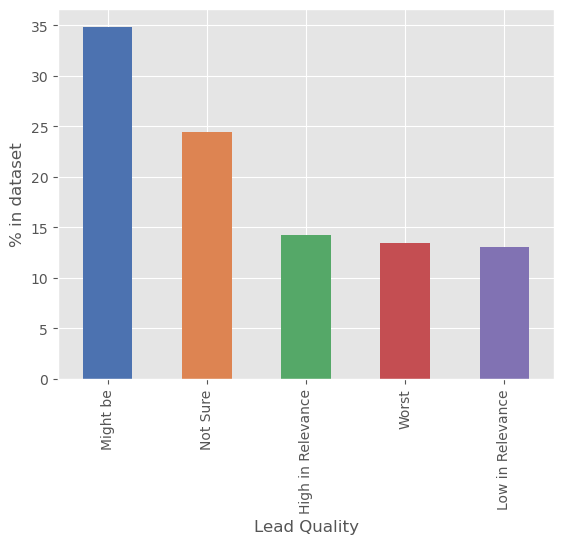

In [15]:
# For Lead Quality
percent_plot('Lead Quality')

### <font color = 'maroon'>Observations:</font>
Null values in the 'Lead Quality' column can be imputed with the value 'Unsure' as we can assume that not filling in a column means the employee does not know or is not sure about the option.

In [16]:
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan, 'Unsure')

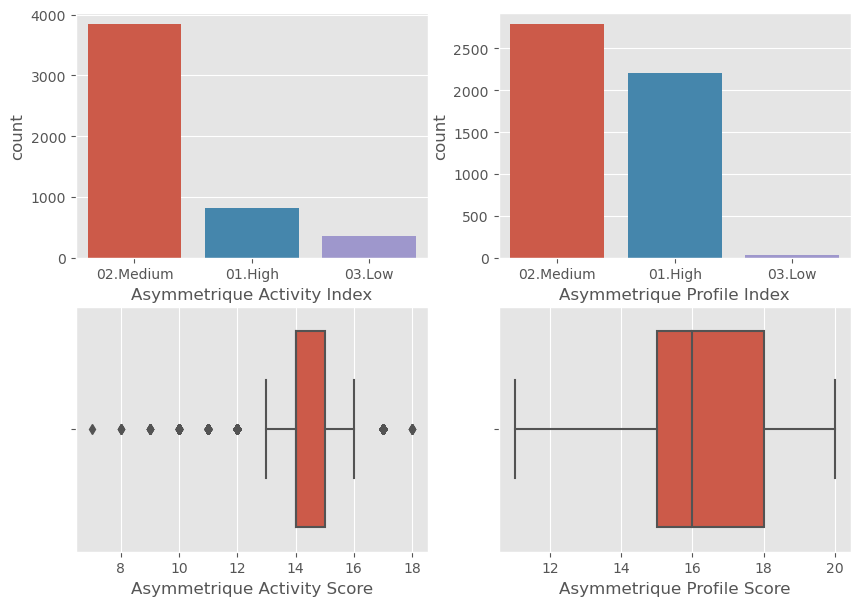

In [17]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asymm_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asymm_list:
    plt.subplot(2,2,asymm_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(data=leads_df, x=var)
    else:
        sns.boxplot(data=leads_df, x=var)
plt.show()

In [18]:
# Describing numerical variables
leads_df[asymm_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


### <font color = 'maroon'>Observations:</font>
These four variables have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model. We'll have to drop these variables.

In [19]:
leads_df = leads_df.drop(asymm_list,1)

In [20]:
# Calculating the percentage of null values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

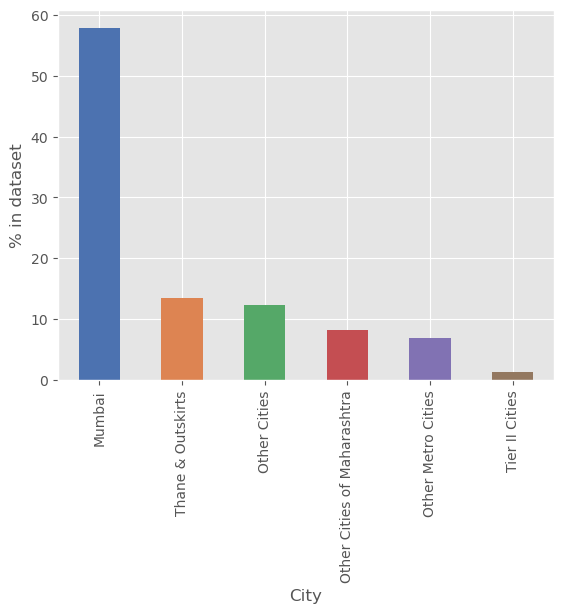

In [21]:
# For 'City'
percent_plot('City')

### <font color = 'maroon'>Observations:</font>
Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [22]:
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

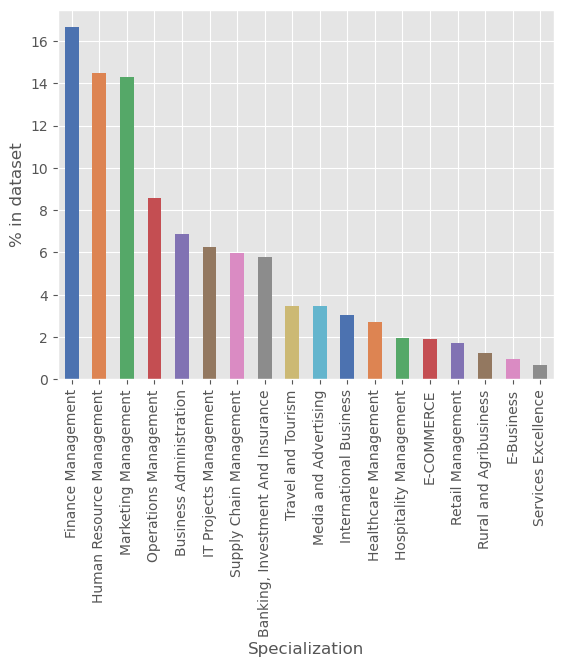

In [23]:
# For 'Specialization'
percent_plot('Specialization')

### <font color = 'maroon'>Observations:</font>
There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column for that.

In [24]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

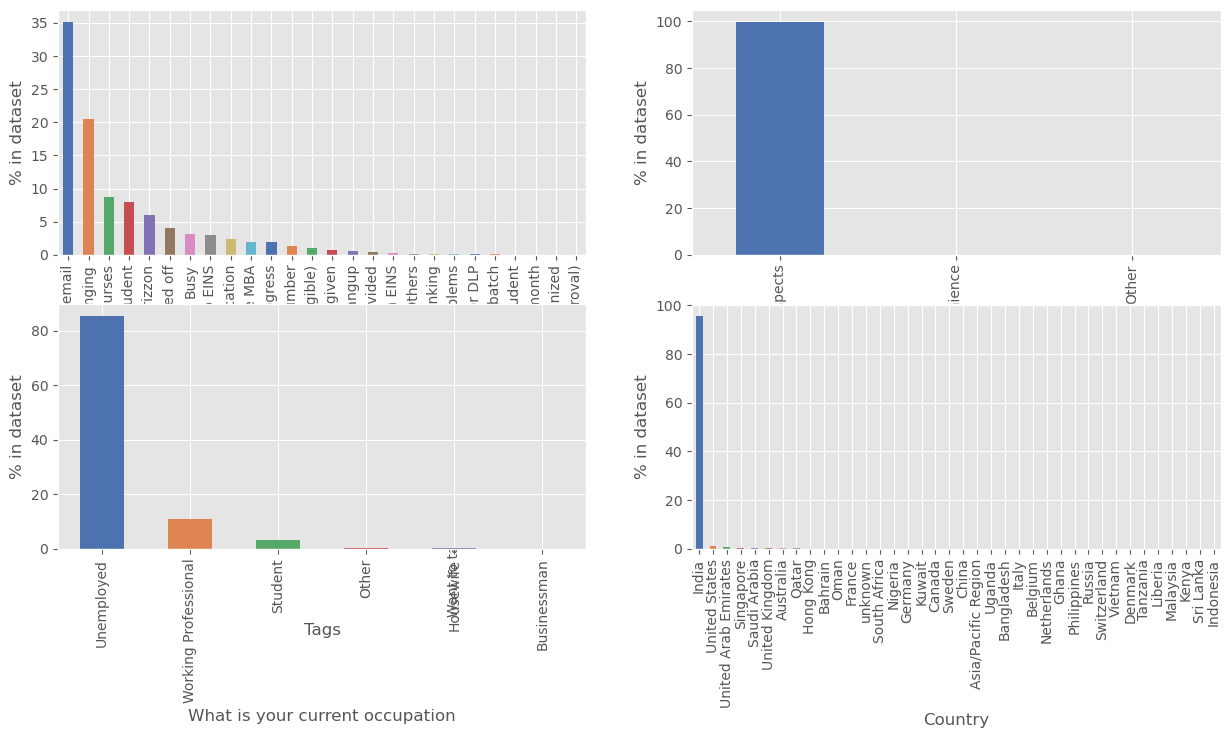

In [25]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']
plt.figure(figsize=(15, 7))
for var in var_list:
    plt.subplot(2,2,var_list.index(var)+1)
    percent_plot(var)

### <font color = 'maroon'>Observations:</font>
In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [26]:
# Imputing with the most frequent value
for var in var_list:
    most_frequent = leads_df[var].describe()['top']
    leads_df[var] = leads_df[var].replace(np.nan, most_frequent)

In [27]:
# Let's see percentage of null values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

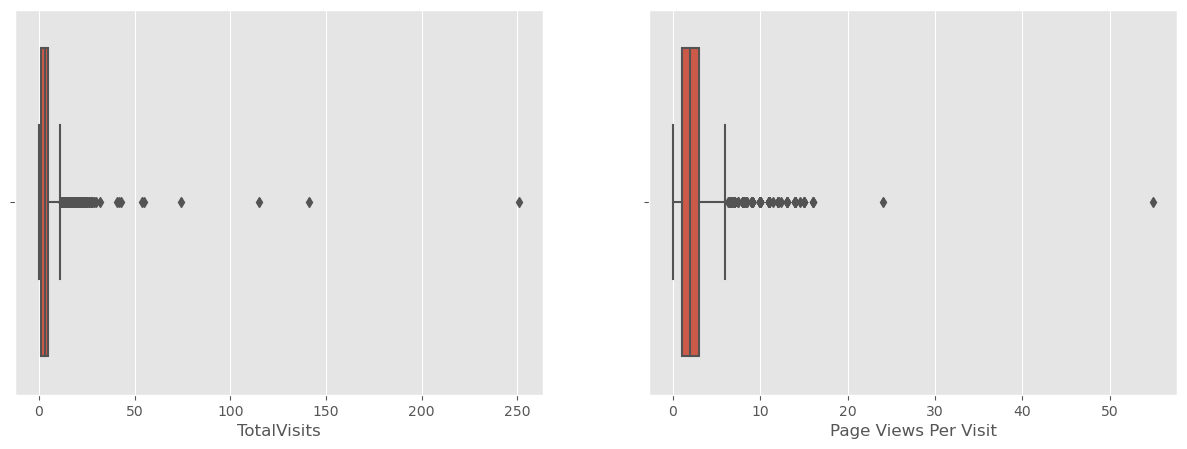

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [28]:
# Outlier Detection and Treatment 
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(data=leads_df, x=var)
plt.show()

leads_df[visit_list].describe()

### <font color = 'maroon'>Observations:</font>
From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

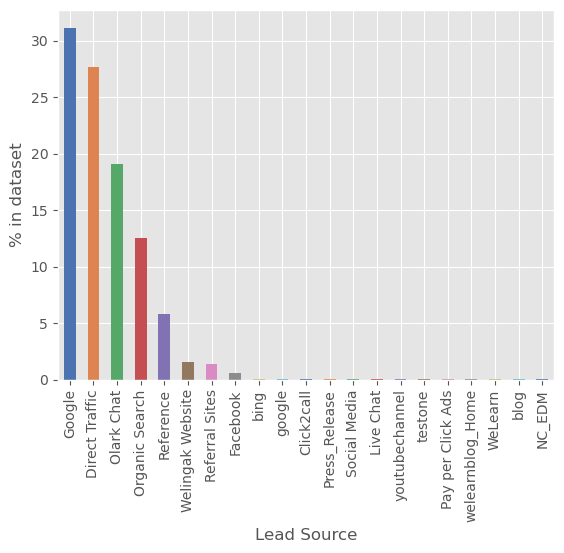

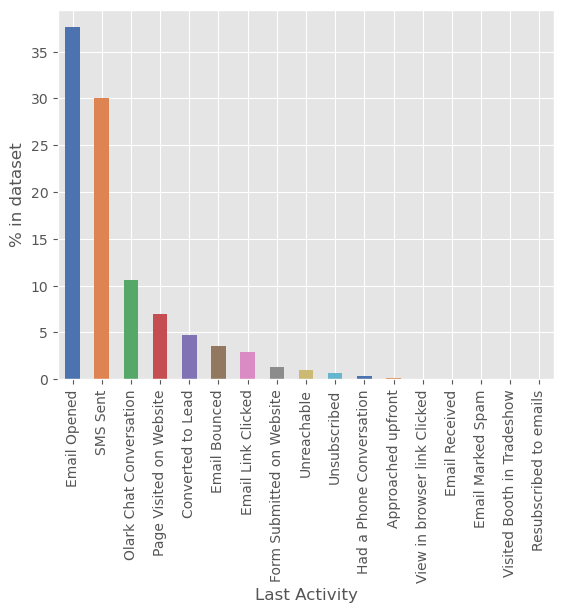

In [29]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

### <font color = 'maroon'>Observations:</font>
In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. Hence, we'll drop the rows containing any missing missing values for above four variables.

In [30]:
# Droping the rows containing missing values
leads_df.dropna(inplace = True)

In [31]:
# Let's see percentage of null values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

## <font color = 'red'>Step 3 : Visualization of the Data</font>

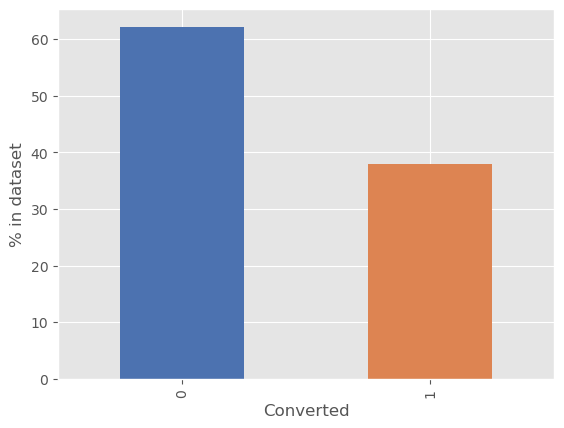

In [32]:
# For the target variable 'Converted'
percent_plot('Converted')

In [33]:
(sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100

37.85541106458012

### <font color = 'maroon'>Observations:</font>
37.85% of the 'Converted' data is 1 ie. 37.85% of the leads are converted. This means we have enough data of converted leads for modelling.

## Step 3.1 :Visualisation of Numerical Variables and Outlier Treatment

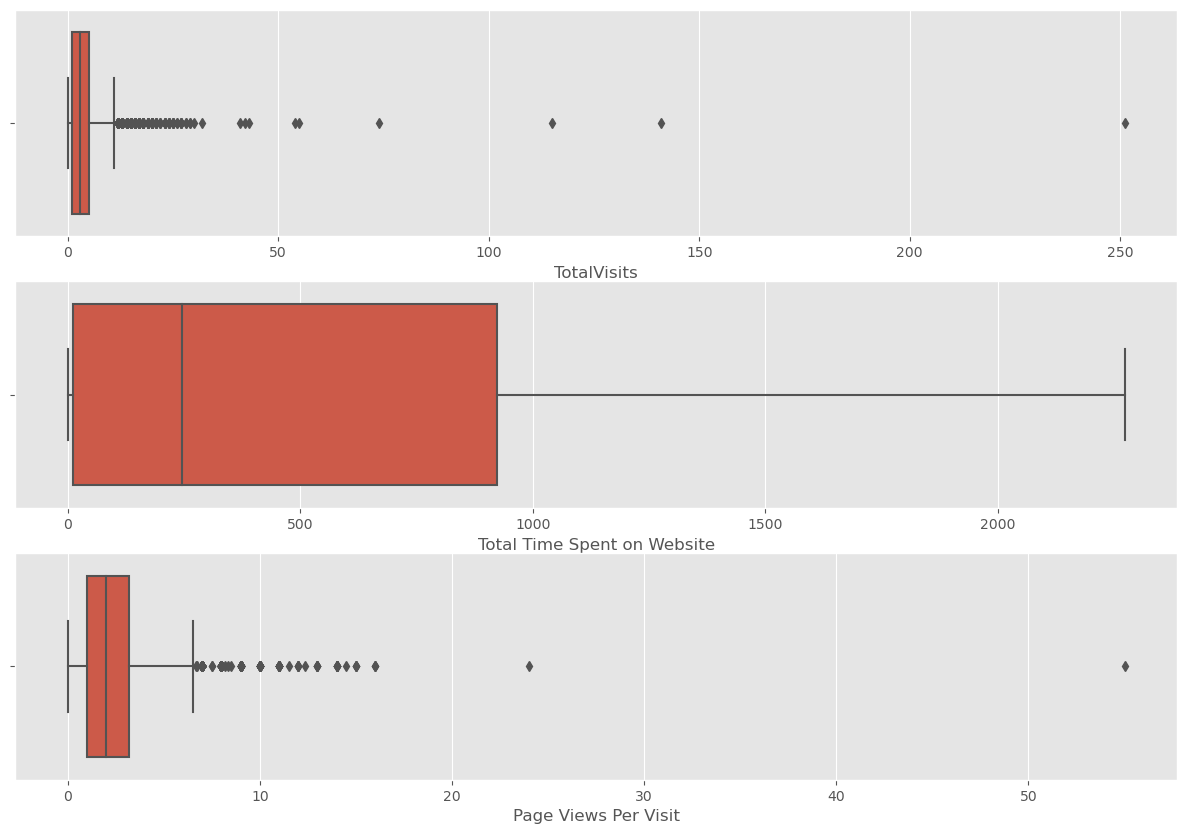

In [34]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=leads_df, x=var)
plt.show()

In [35]:
leads_df[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


### <font color = 'maroon'>Observations:</font>
From the abbove boxplots, we can observe that there are outliers present in the variables.
- For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
- There are no significant outliers in 'Total Time Spent on Website'
- For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

In [36]:
# Treatment of Outlier
percentile = leads_df['TotalVisits'].quantile([0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = leads_df['Page Views Per Visit'].quantile([0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

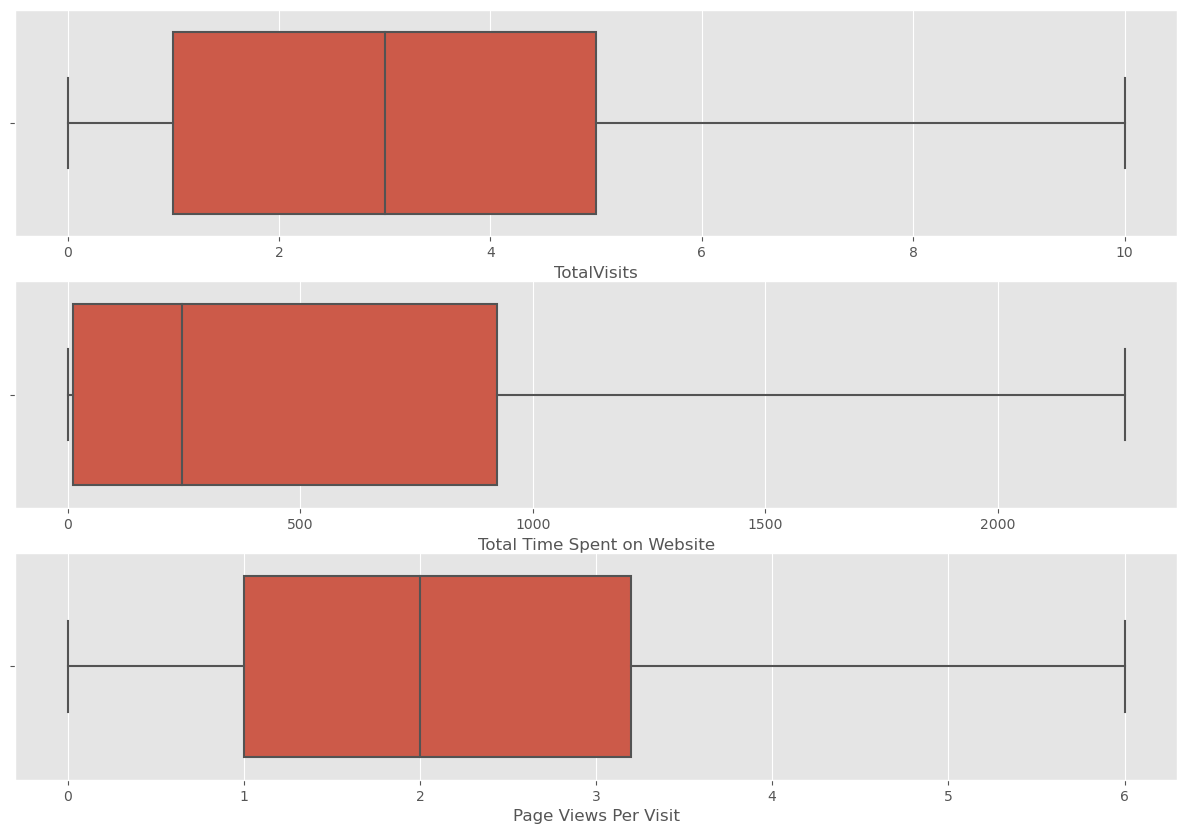

In [37]:
# Verification using Plot Boxplots
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=leads_df, x=var)
plt.show()

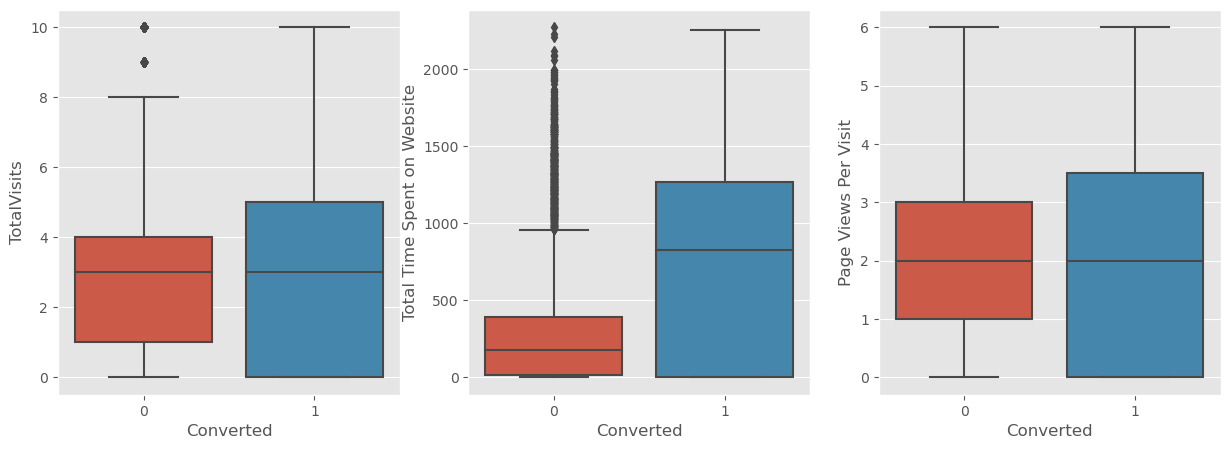

In [38]:
# To plot numerical variables against target variable to analyze relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = leads_df)
plt.show()

### <font color = 'maroon'>Observations:</font>
- 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
- People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.
- 'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

## Step 3.2 :Visualisation of Categorical Variables and Outlier Treatment

In [39]:
# Categorical variables
cat_var = list(leads_df.columns[leads_df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [40]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = leads_df)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = leads_df)
        plt.xticks(rotation = 90)
    plt.show()

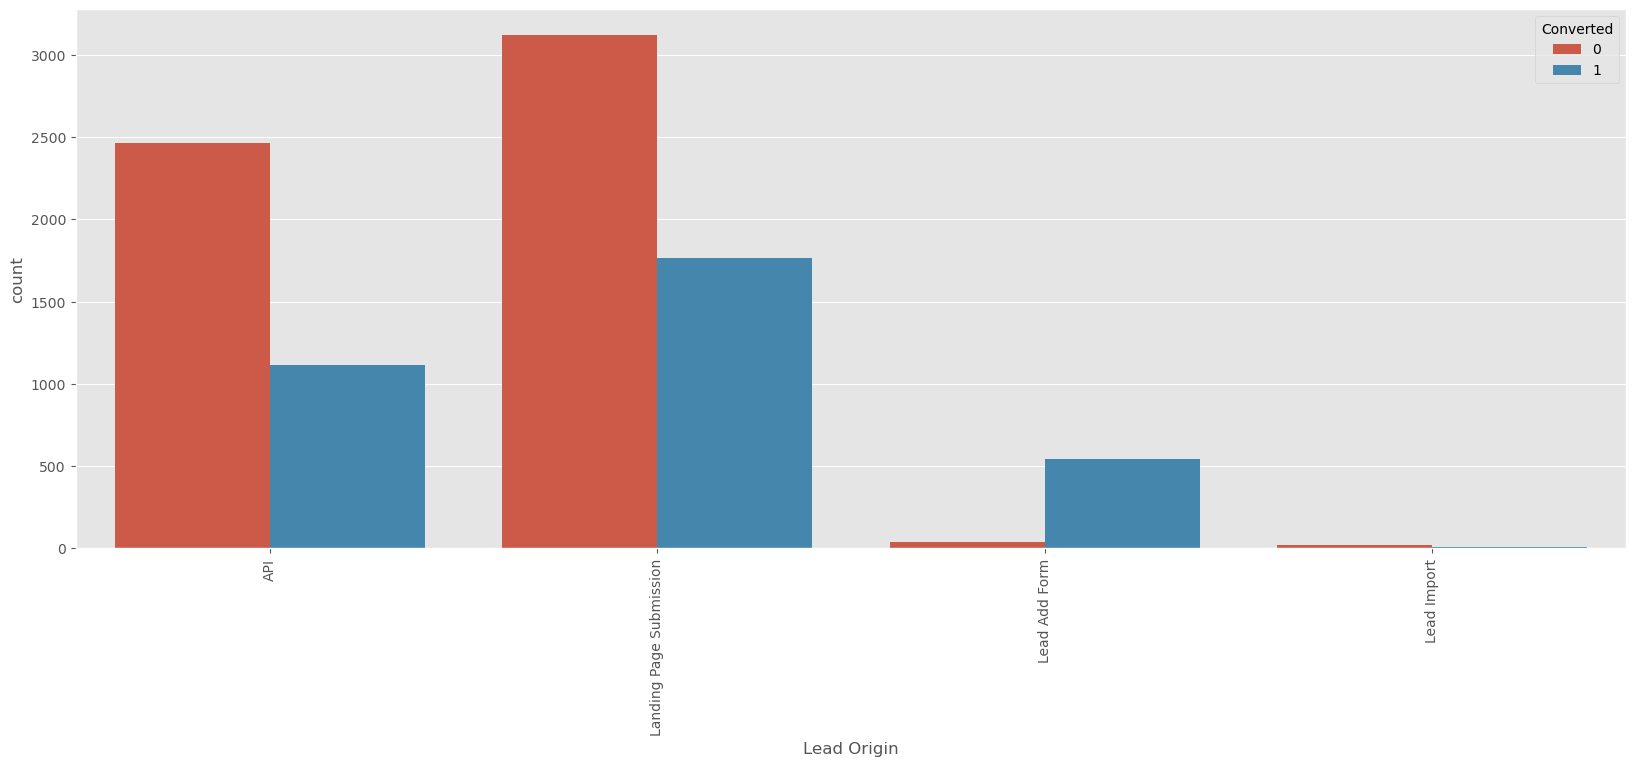

In [41]:
plot_cat_var(cat_var[0])

### <font color = 'maroon'>Observations:</font>
**For Lead Origin:**  
'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. **We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'**. 'Lead Import' does not seem very significant.

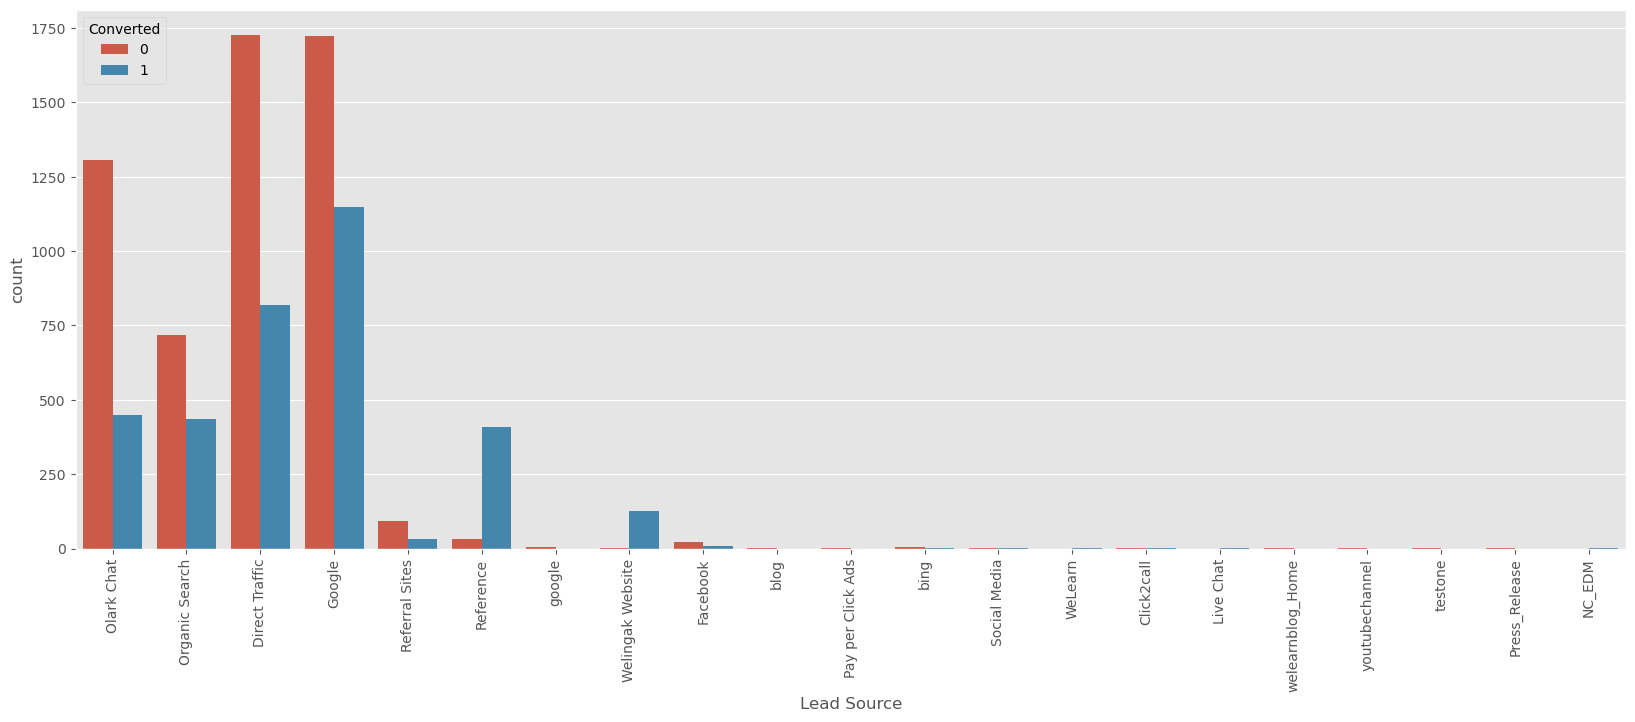

In [42]:
plot_cat_var(cat_var[1])

### <font color = 'maroon'>Observations:</font>
**For Lead Score:**  
- Error in Spelling : We've to change 'google' to 'Google'
- As it can be observed from the above graph, the number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. Hence, We will convert all others in one single category of 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [43]:
# Correcting the spelling error
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')

In [44]:
categories = leads_df['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [45]:
# Reducing categories
leads_df['Lead Source'] = leads_df['Lead Source'].replace(categories[8:], 'Others')

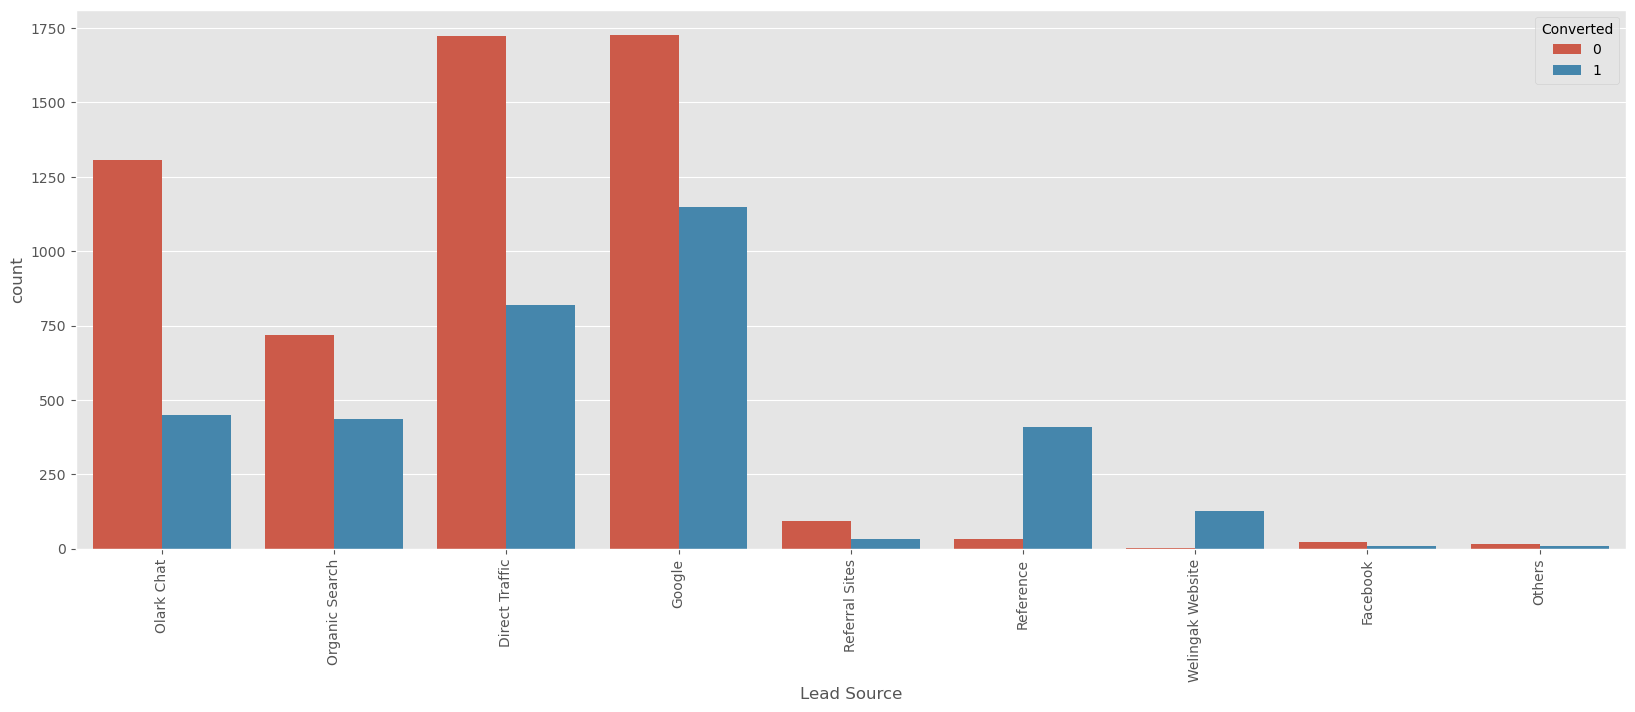

In [46]:
# Plot new categories
plot_cat_var(cat_var[1])

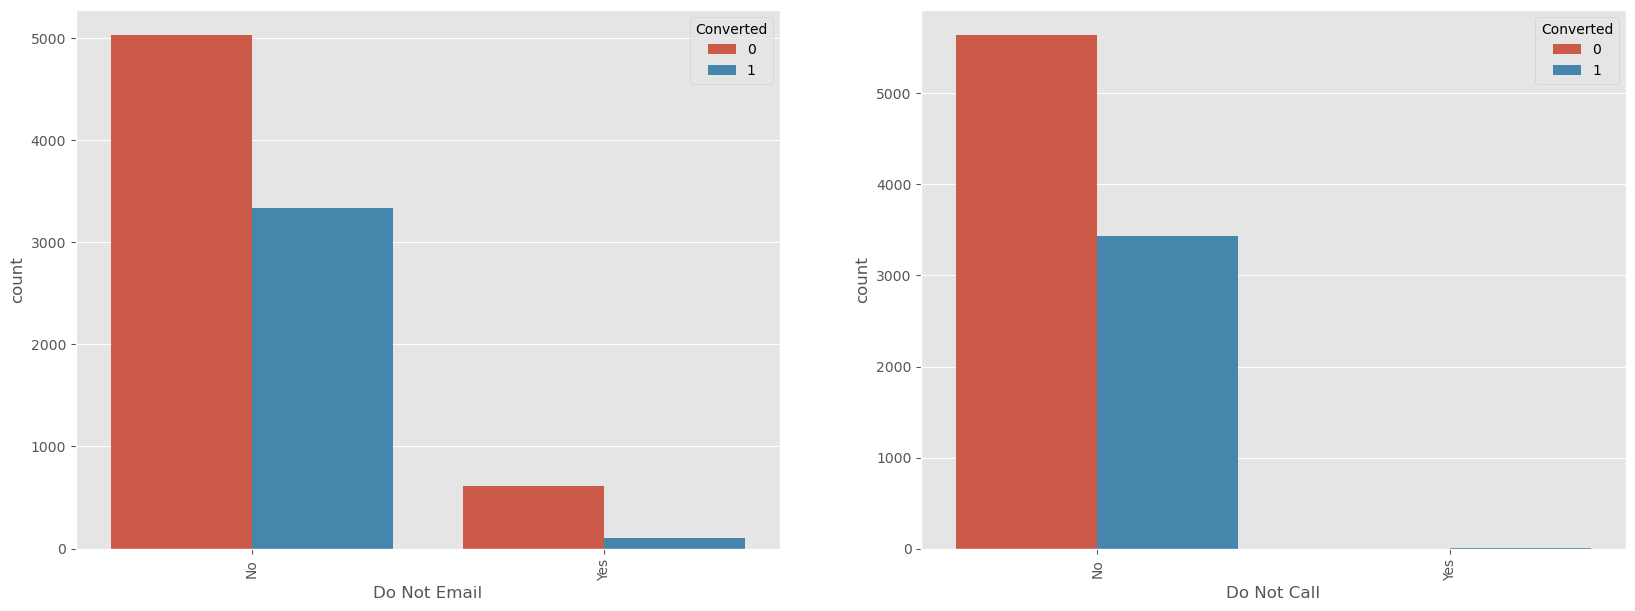

In [47]:
plot_cat_vars([cat_var[2],cat_var[3]])

### <font color = 'maroon'>Observations:</font>
**For "Do not Email" and "Do Not Call":**

As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

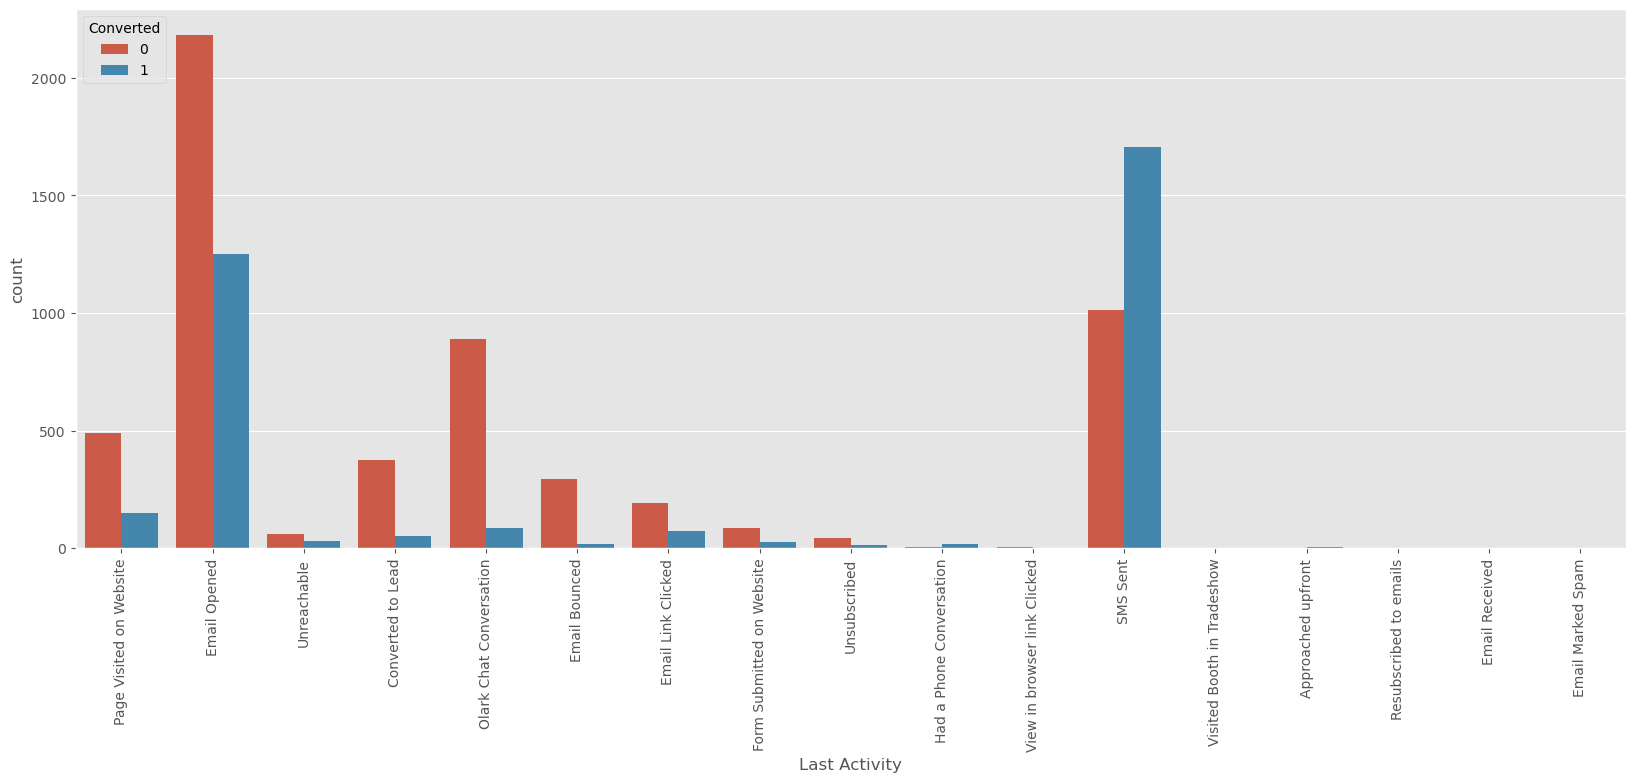

In [48]:
plot_cat_var(cat_var[4])

### <font color = 'maroon'>Observations:</font>
**For "Last Activity":**
- Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
- Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [49]:
categories = leads_df['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

### <font color = 'maroon'>Observations:</font>
We can now observe from above that we do not require last five categories.

In [50]:
# Reducing categories
leads_df['Last Activity'] = leads_df['Last Activity'].replace(categories[-5:], 'Others')

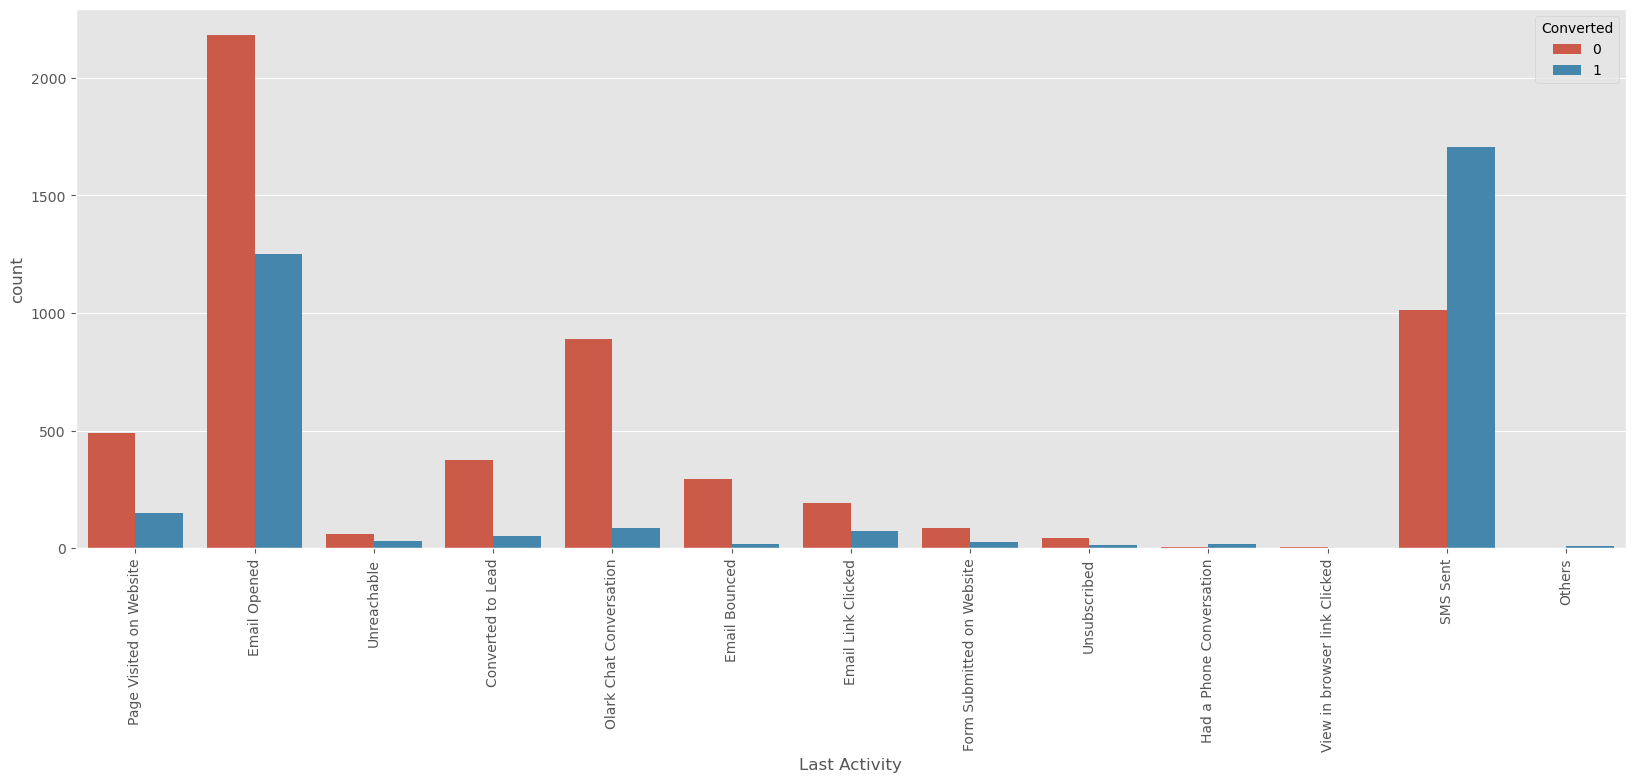

In [51]:
#Ploting new categories
plot_cat_var(cat_var[4])

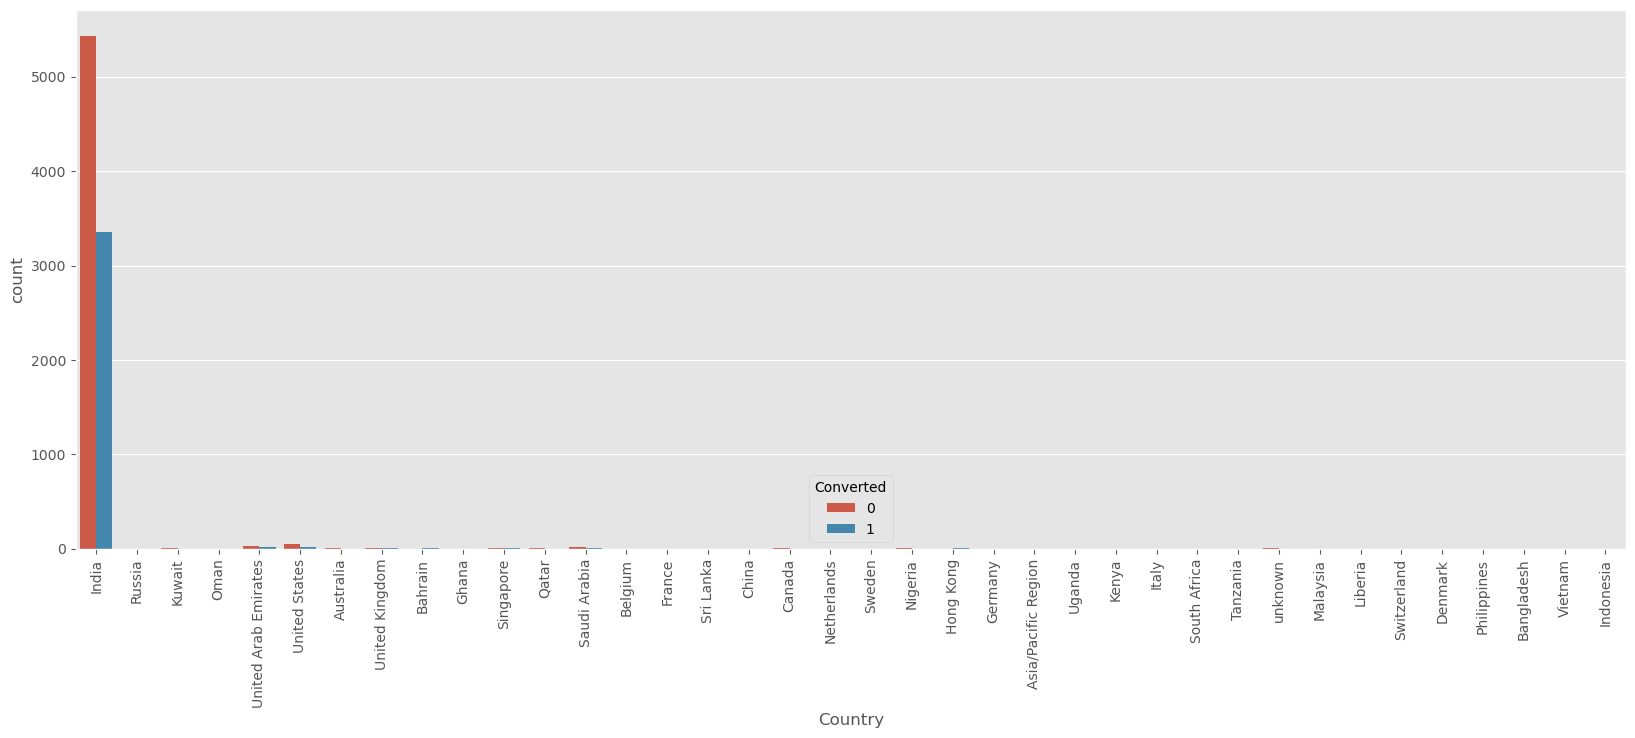

In [52]:
plot_cat_var(cat_var[5])

### <font color = 'maroon'>Observations:</font>
**For "Country":**

Most of the responses are for India. Others are not significant.

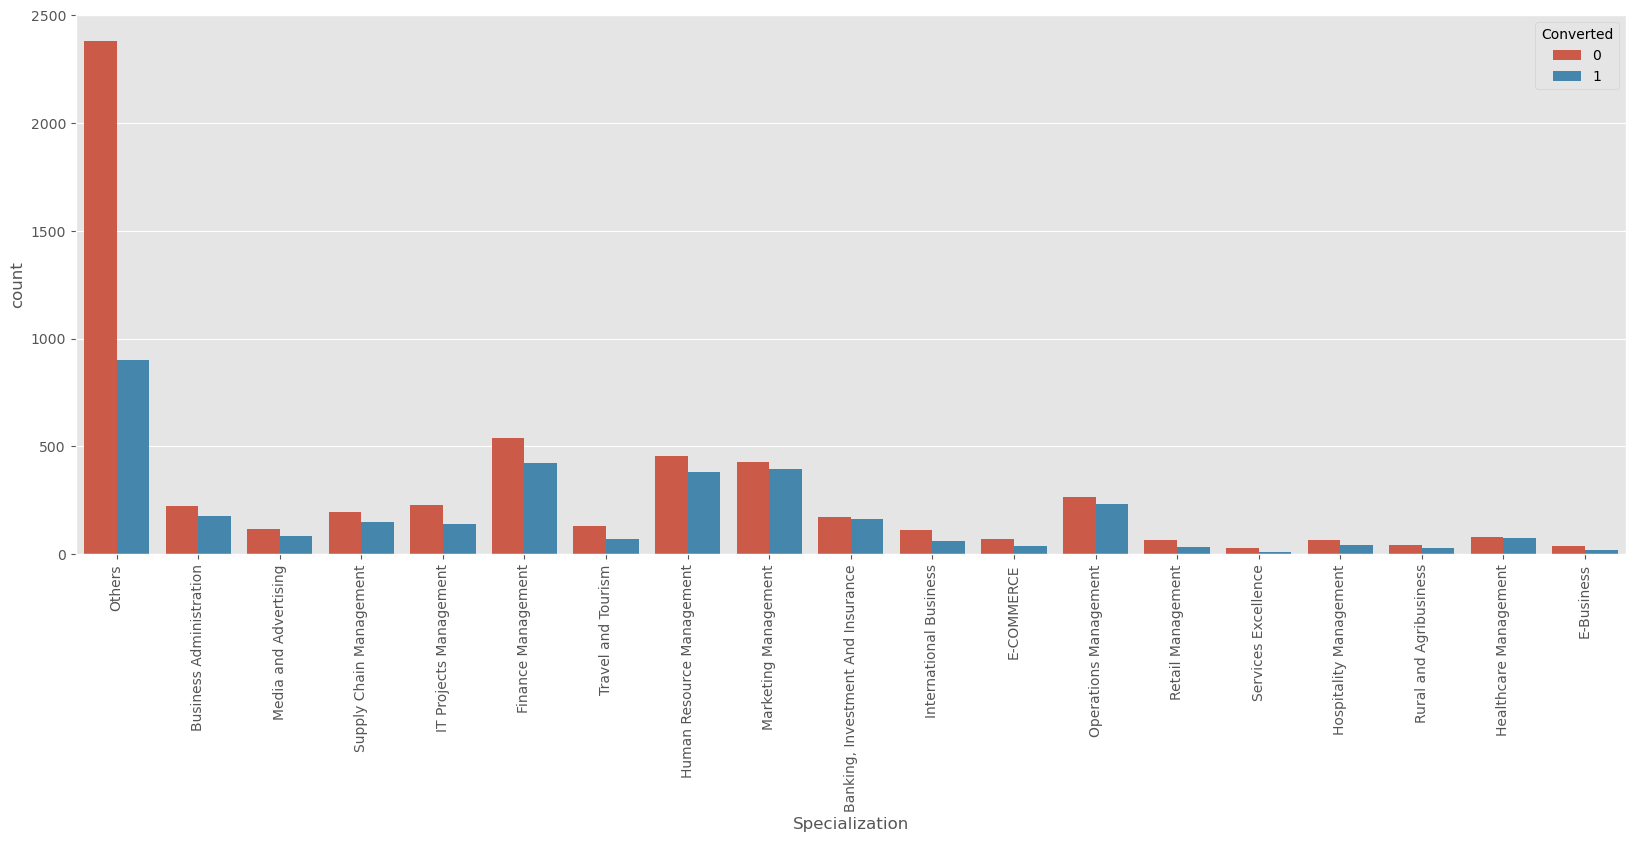

In [53]:
plot_cat_var(cat_var[6])

### <font color = 'maroon'>Observations:</font>
**For "Specialization":**

Conversion rates are mostly similar across different specializations.

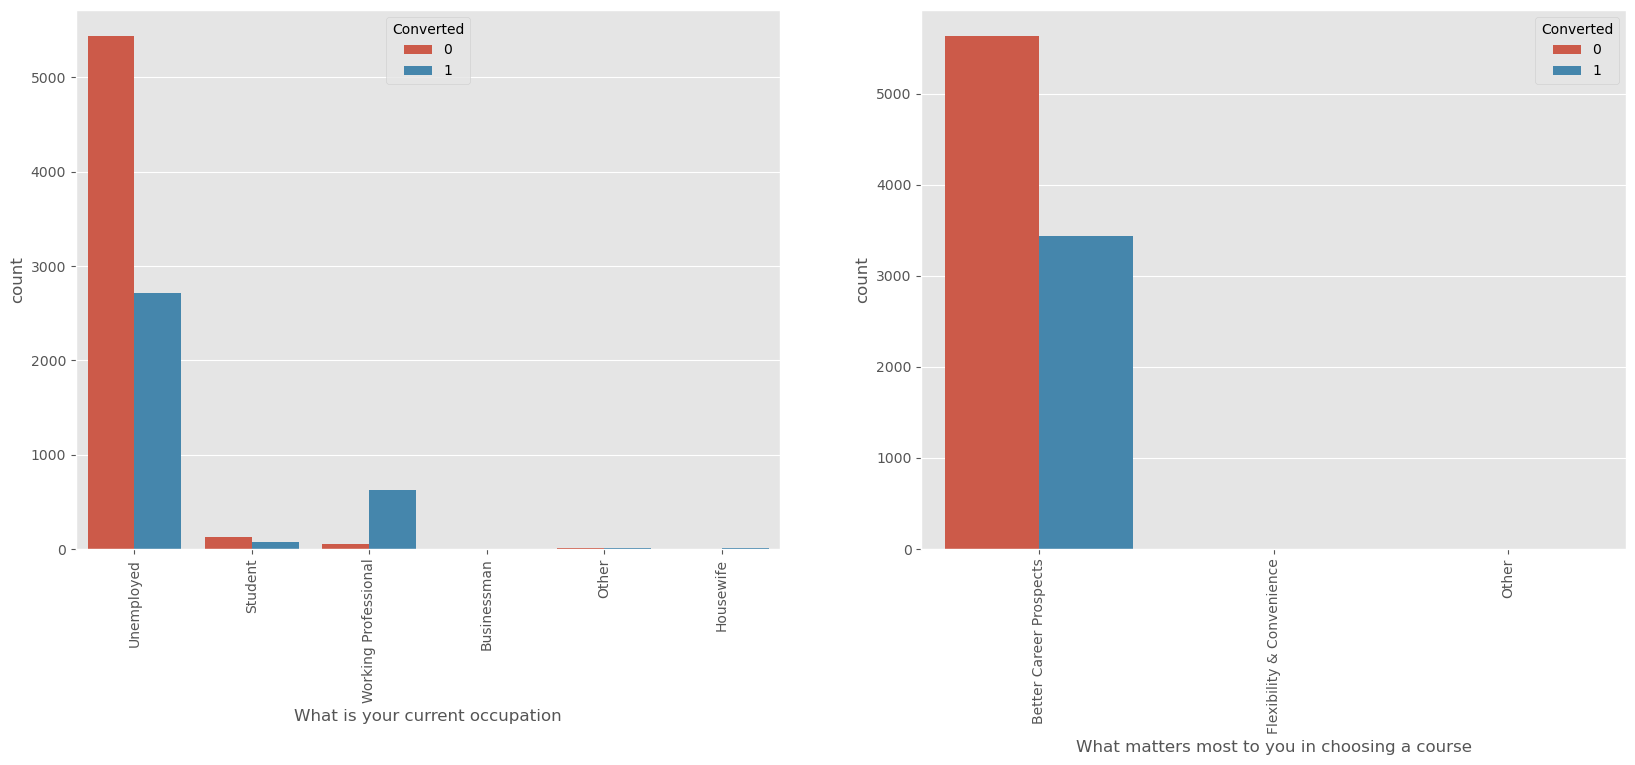

In [54]:
plot_cat_vars([cat_var[7],cat_var[8]])

### <font color = 'maroon'>Observations:</font>
**For "What is your current occupation" and "What matters most to you in choosing a course":**

- The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
- Variable 'What matters most to you in choosing a course' has only one category with significant count.

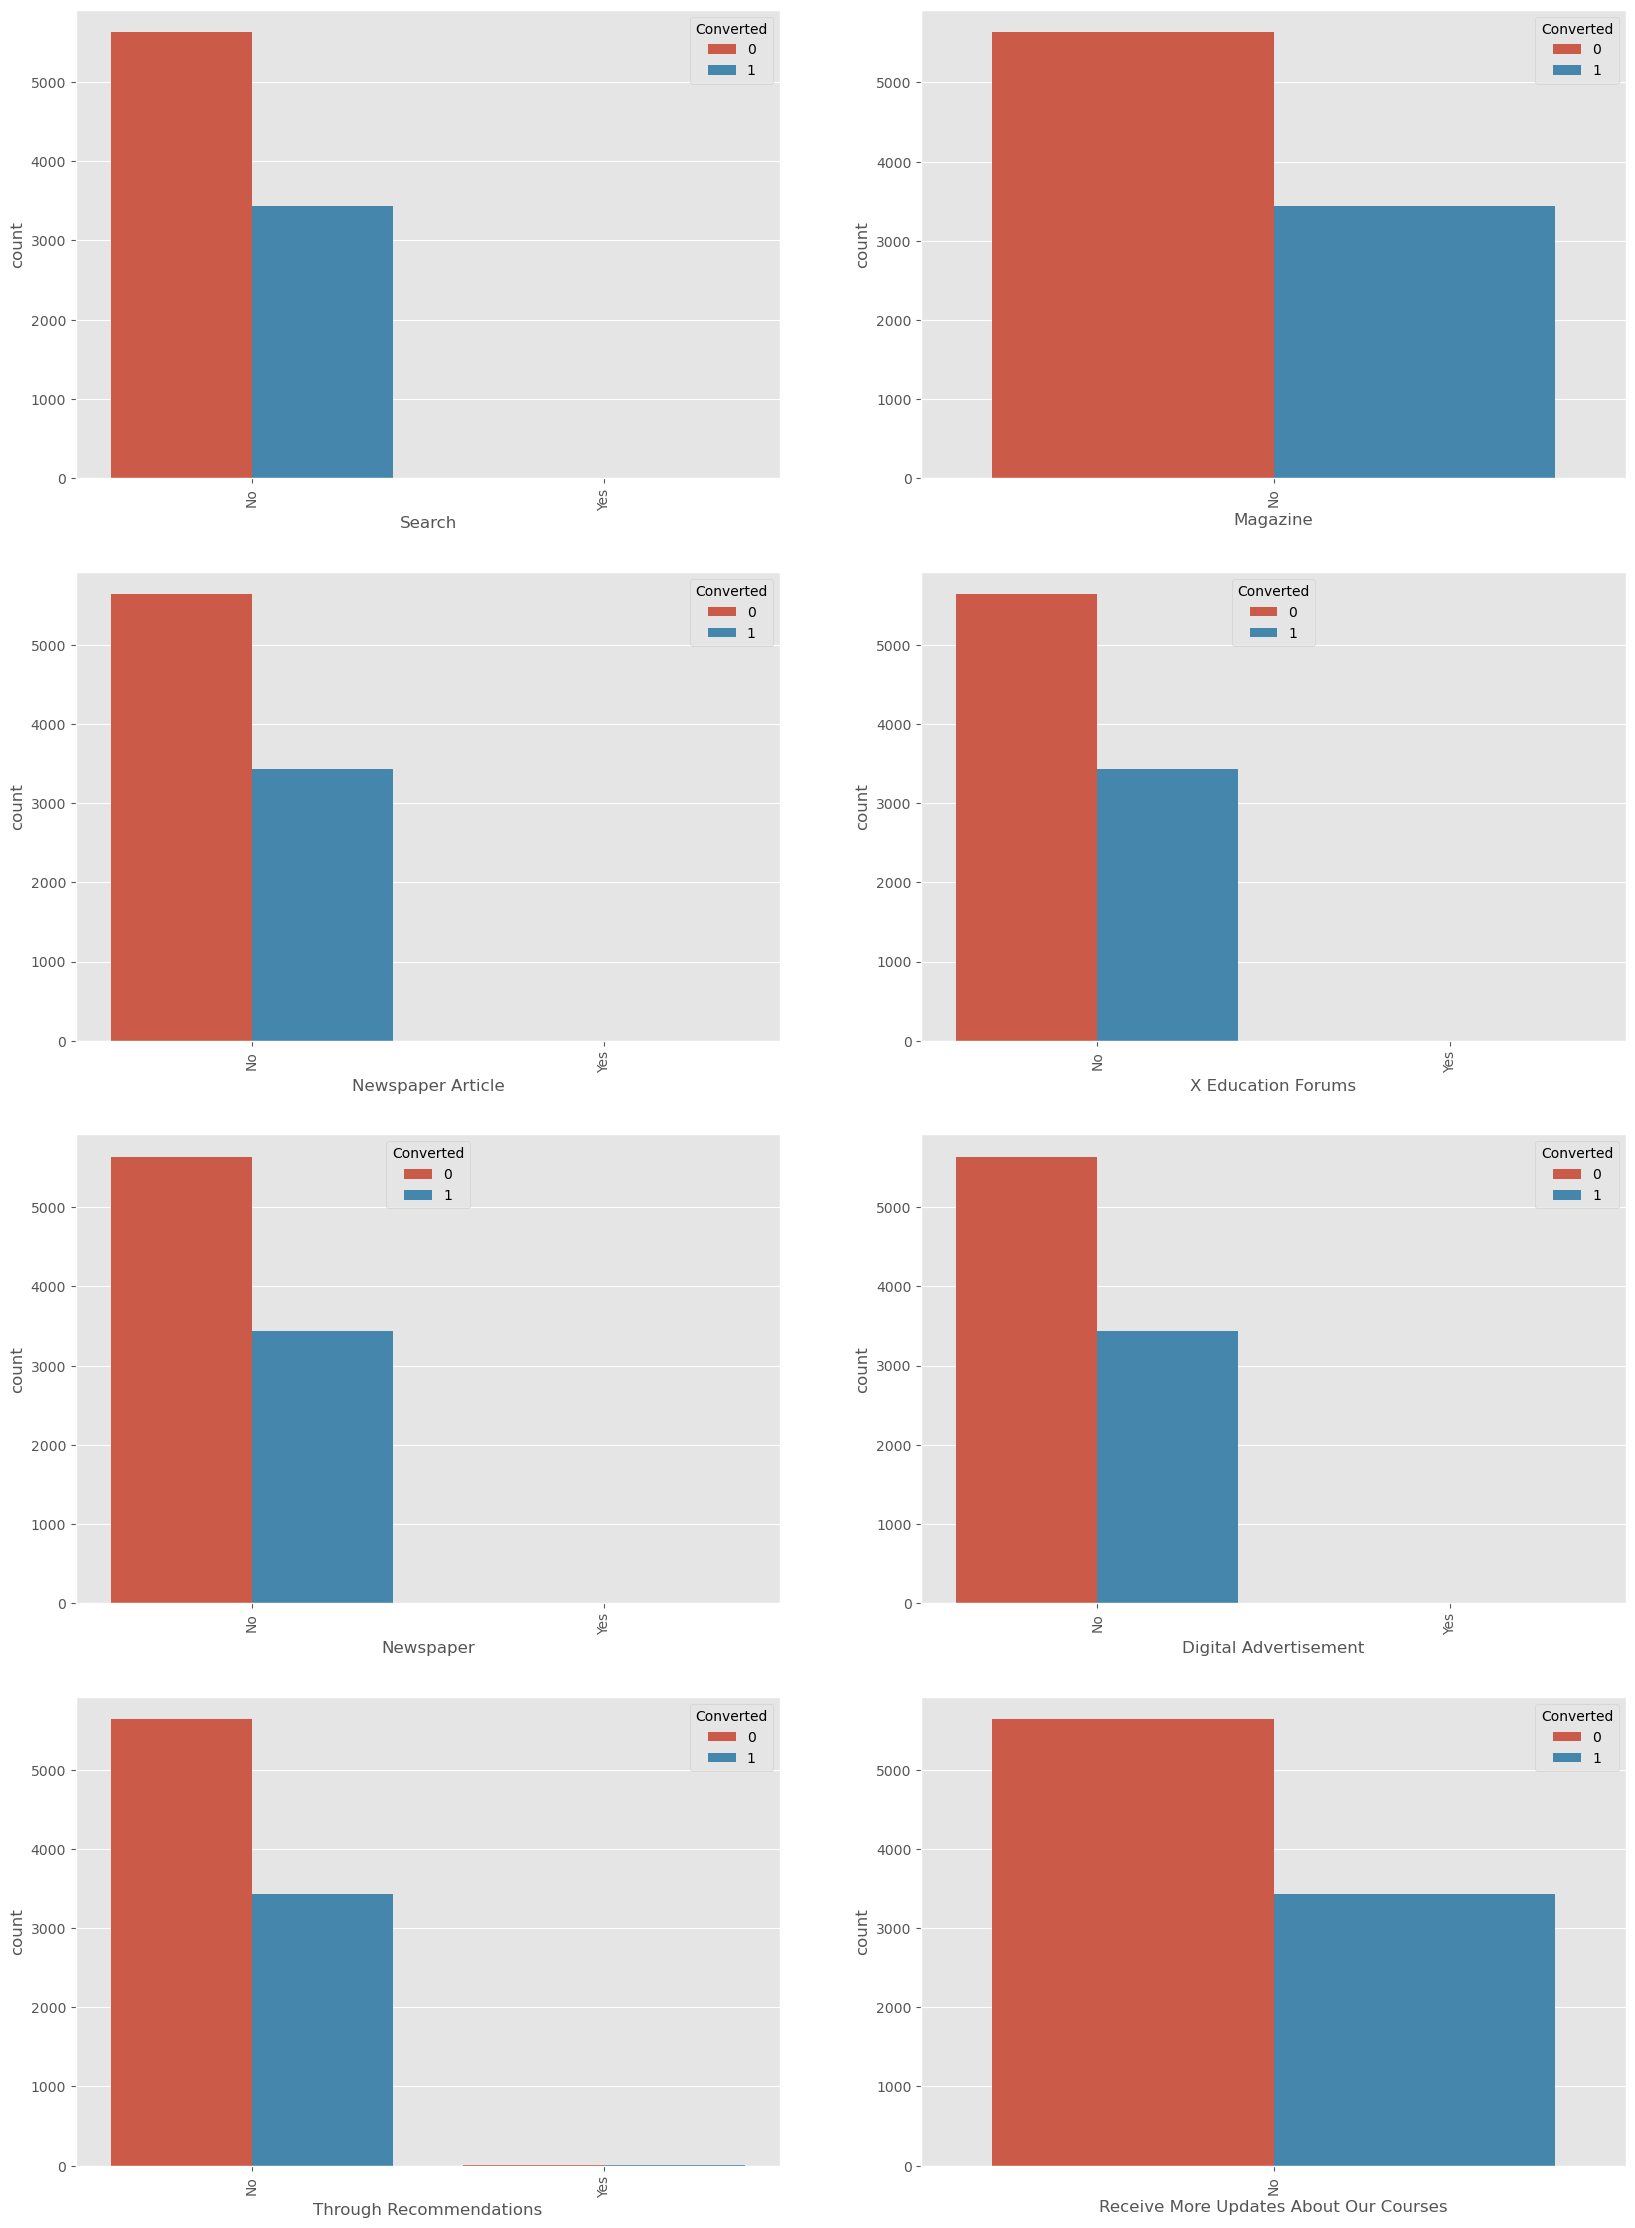

In [55]:
plot_cat_vars(cat_var[9:17])

### <font color = 'maroon'>Observations:</font>
**For "Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses":**

As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

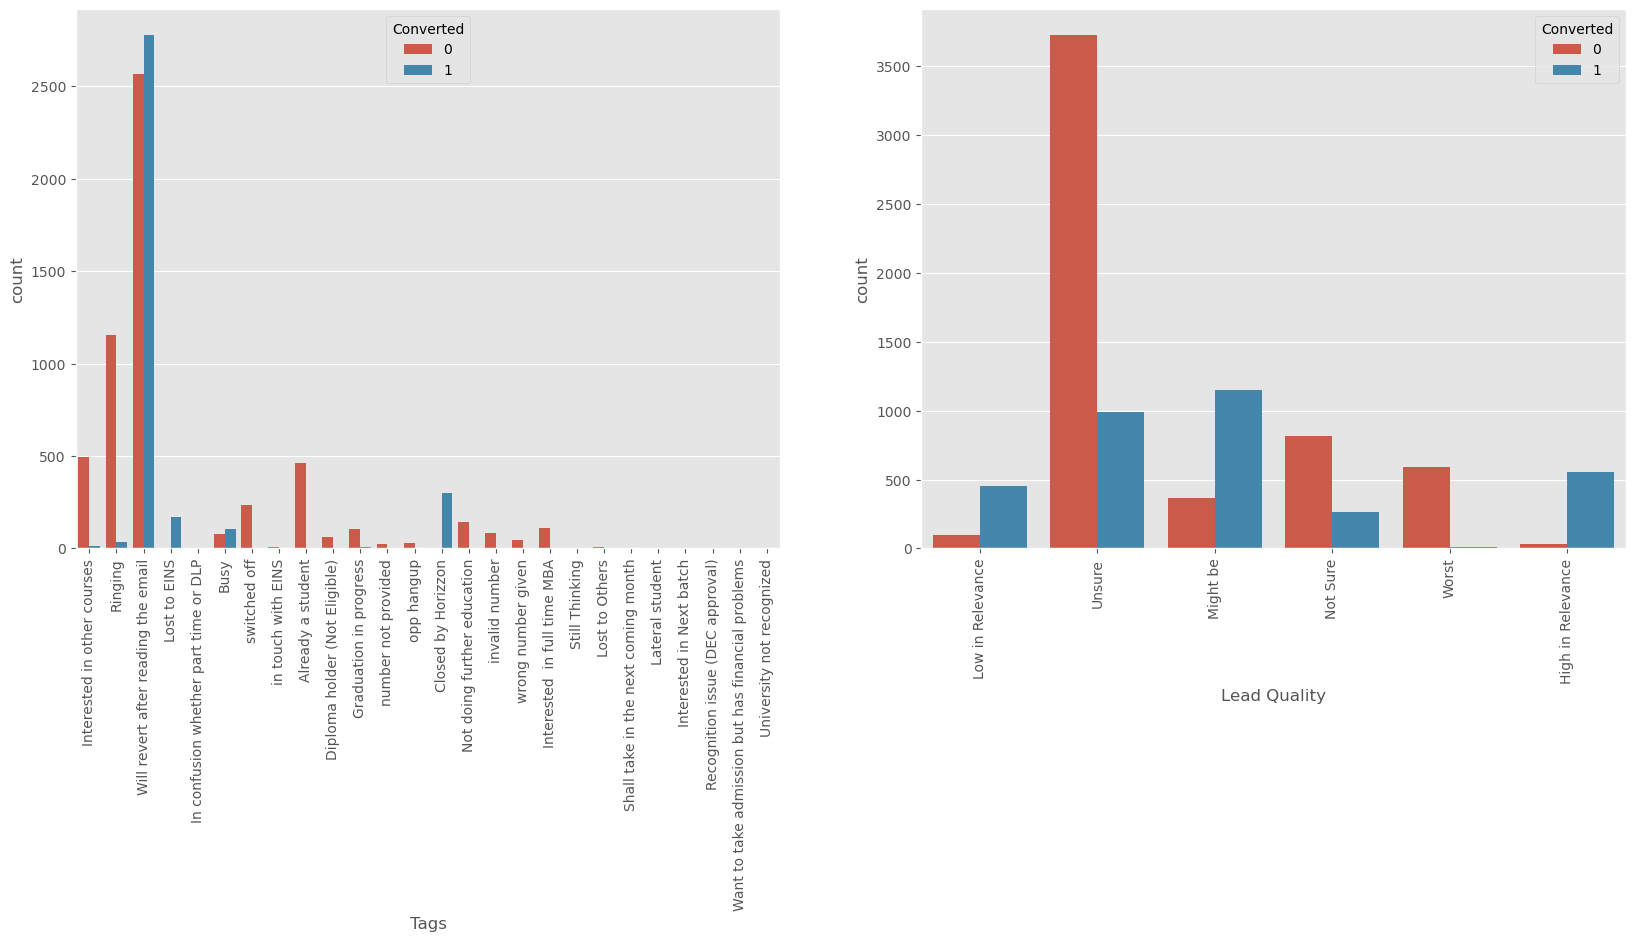

In [56]:
plot_cat_vars([cat_var[17],cat_var[18]])

### <font color = 'maroon'>Observations:</font>
**For "Tags" and "Lead Quality":**

- In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
- Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.
- In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Worst' has the lowest.

In [57]:
categories = leads_df['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

### <font color = 'maroon'>Observations:</font>

We can combine that last eight categories.

In [58]:
# Reducing categories
leads_df['Tags'] = leads_df['Tags'].replace(categories[-8:], 'Others')

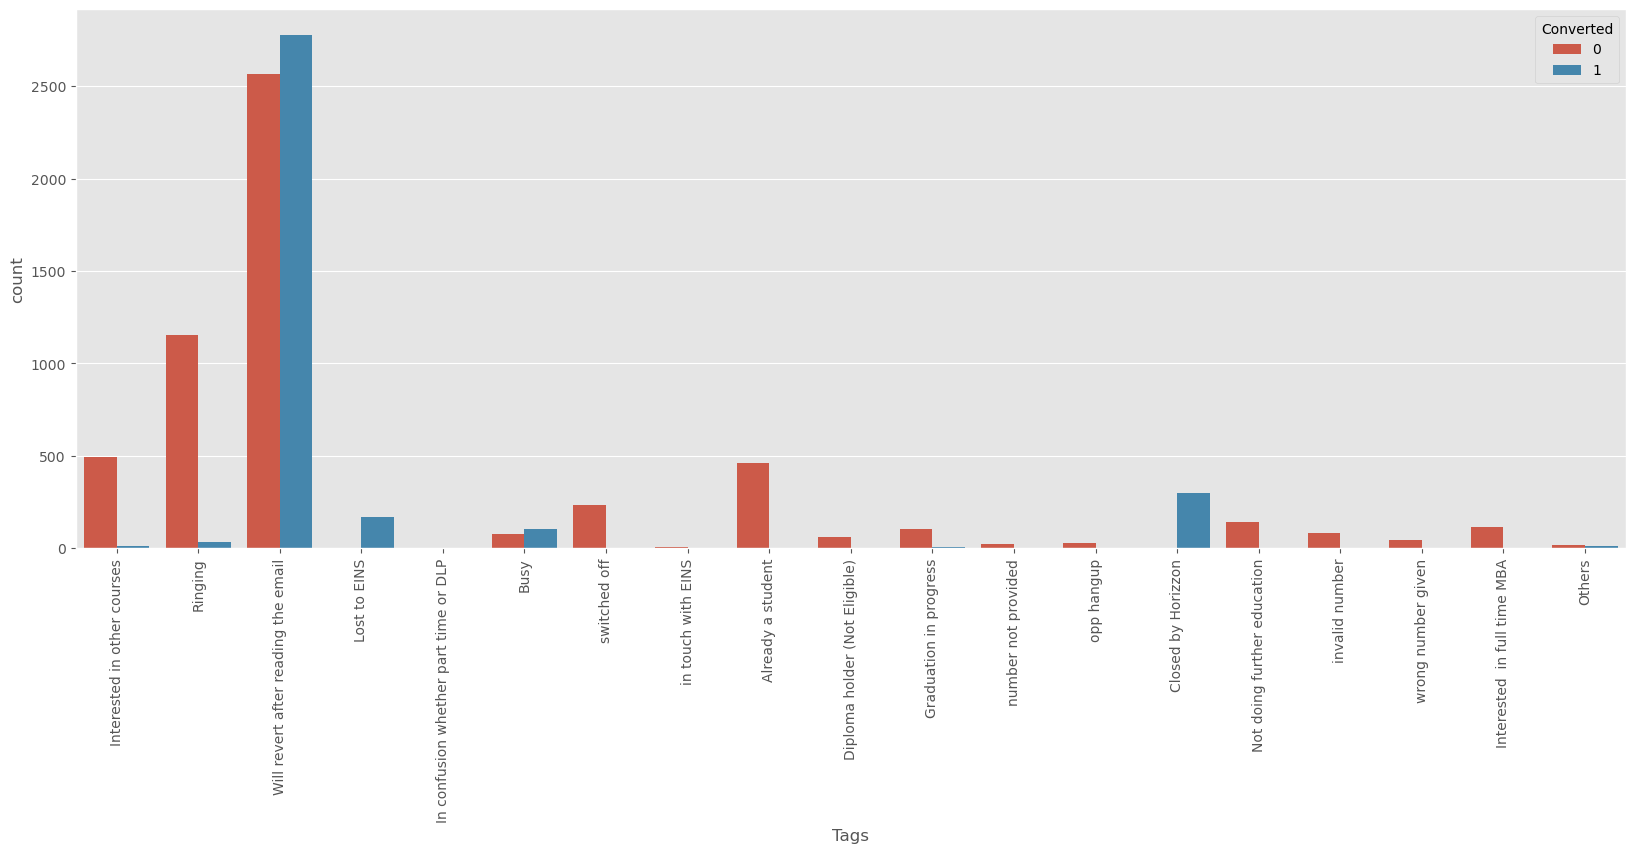

In [59]:
# Ploting new categories
plot_cat_var(cat_var[17])

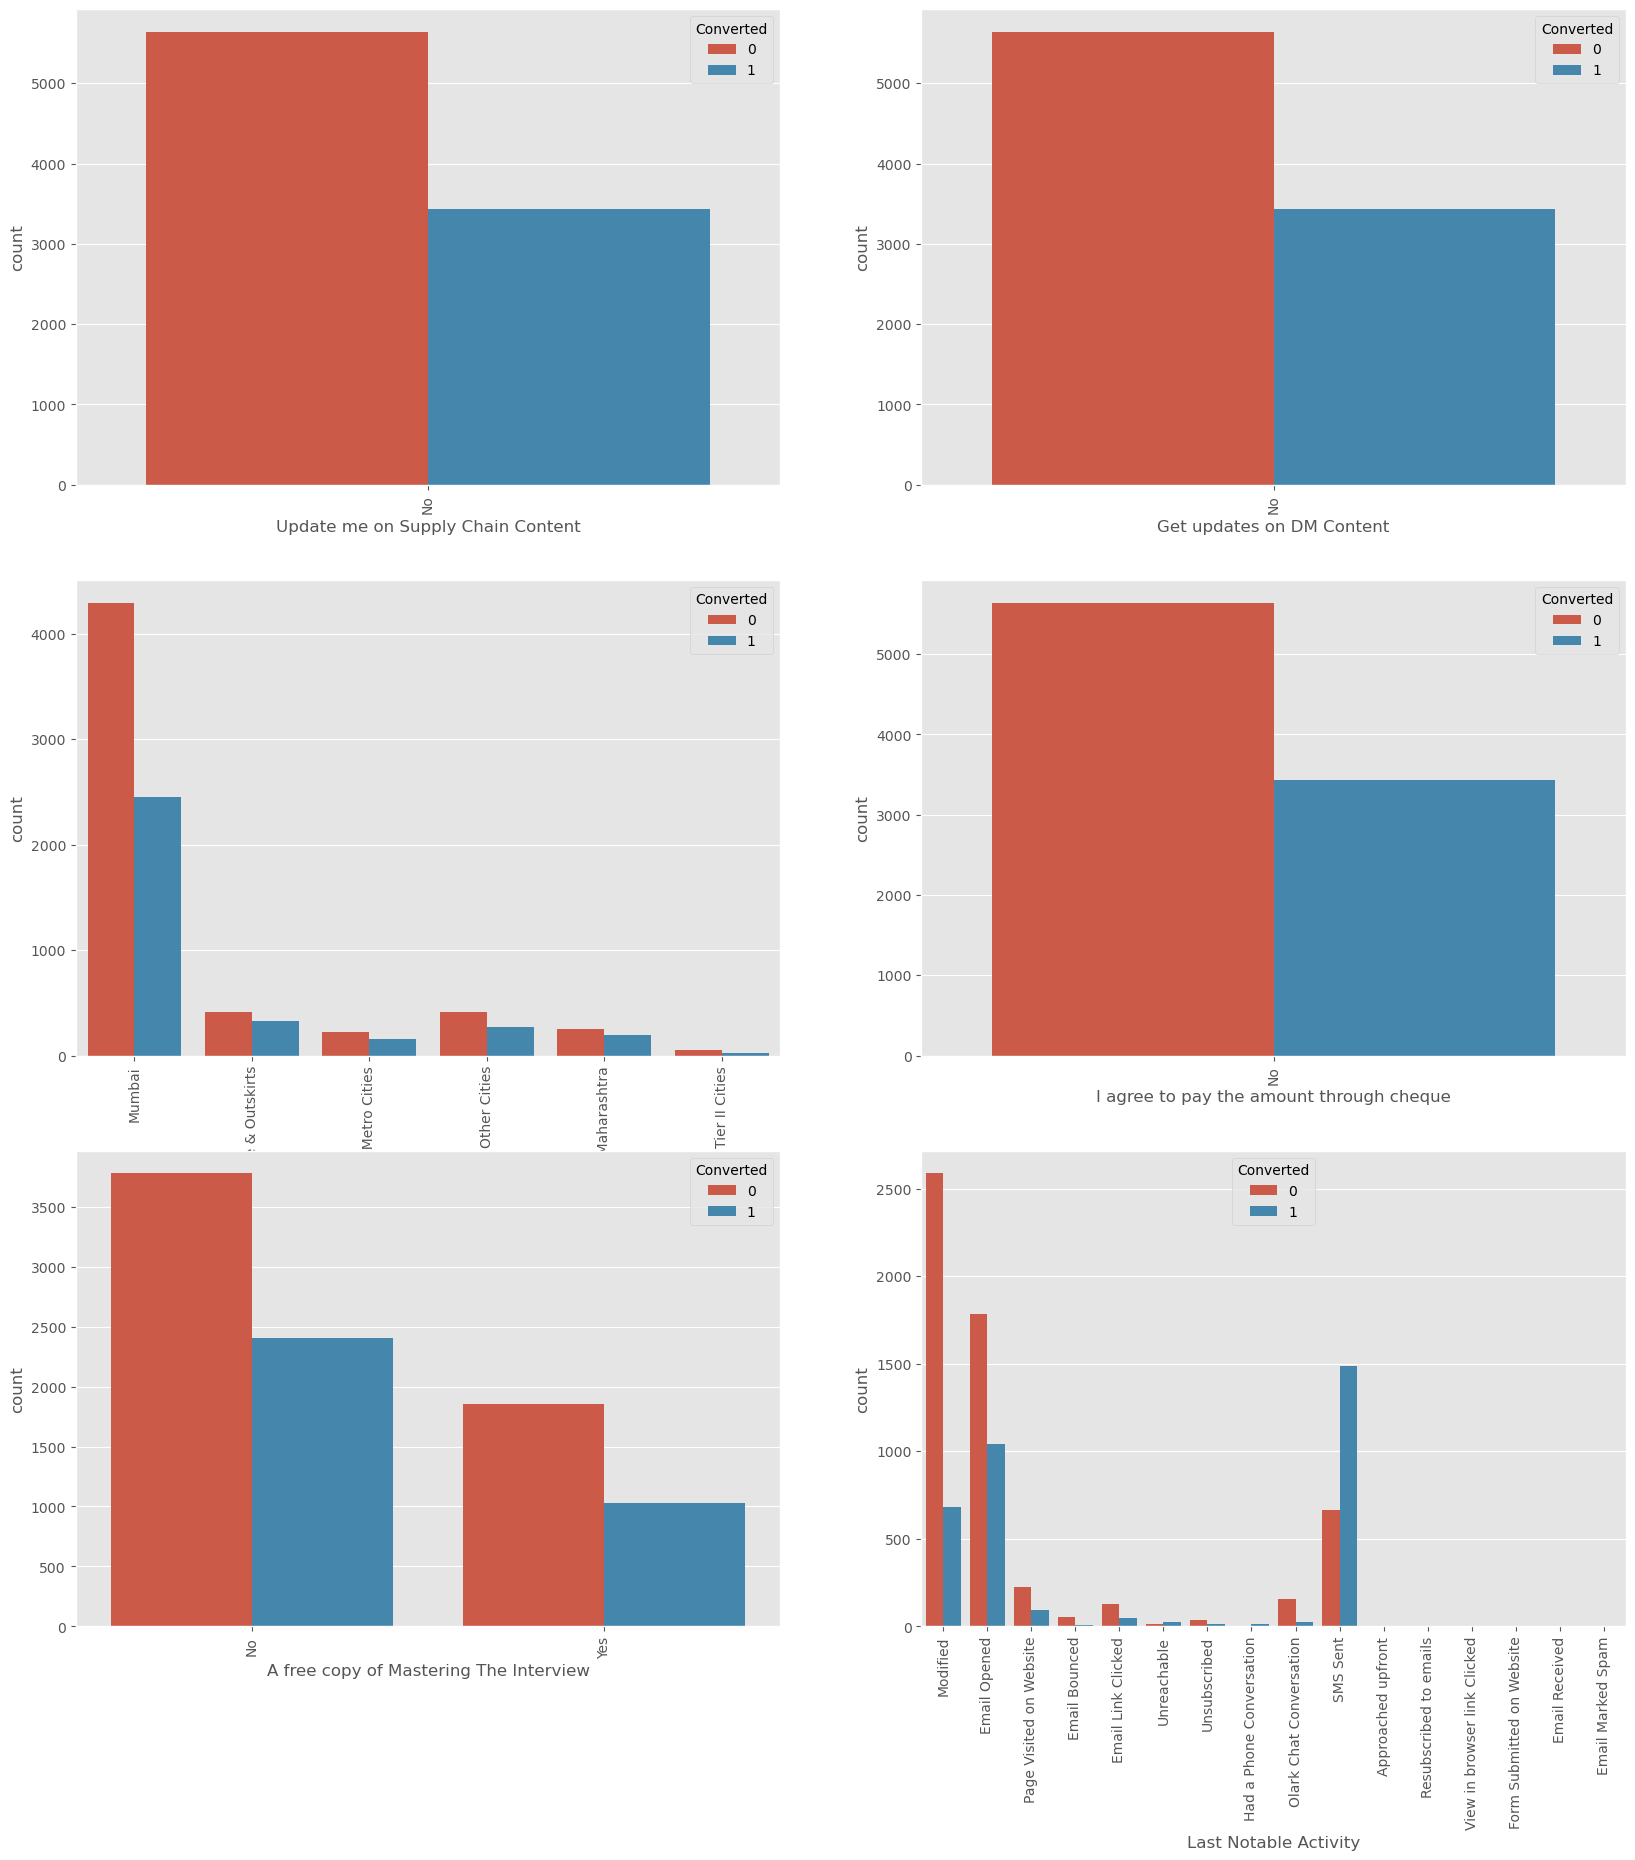

In [60]:
plot_cat_vars(cat_var[19:25])

### <font color = 'maroon'>Observations:</font>
**For Update me on "Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, and Last Notable Activity":**

- Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'.
- In City, most of the leads are generated for 'Mumbai'.
In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
- In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. - It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [61]:
categories = leads_df['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

### <font color = 'maroon'>Observations:</font>

We here observe that we do not require last six categories.

In [62]:
# Reducing categories
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(categories[-6:], 'Others')

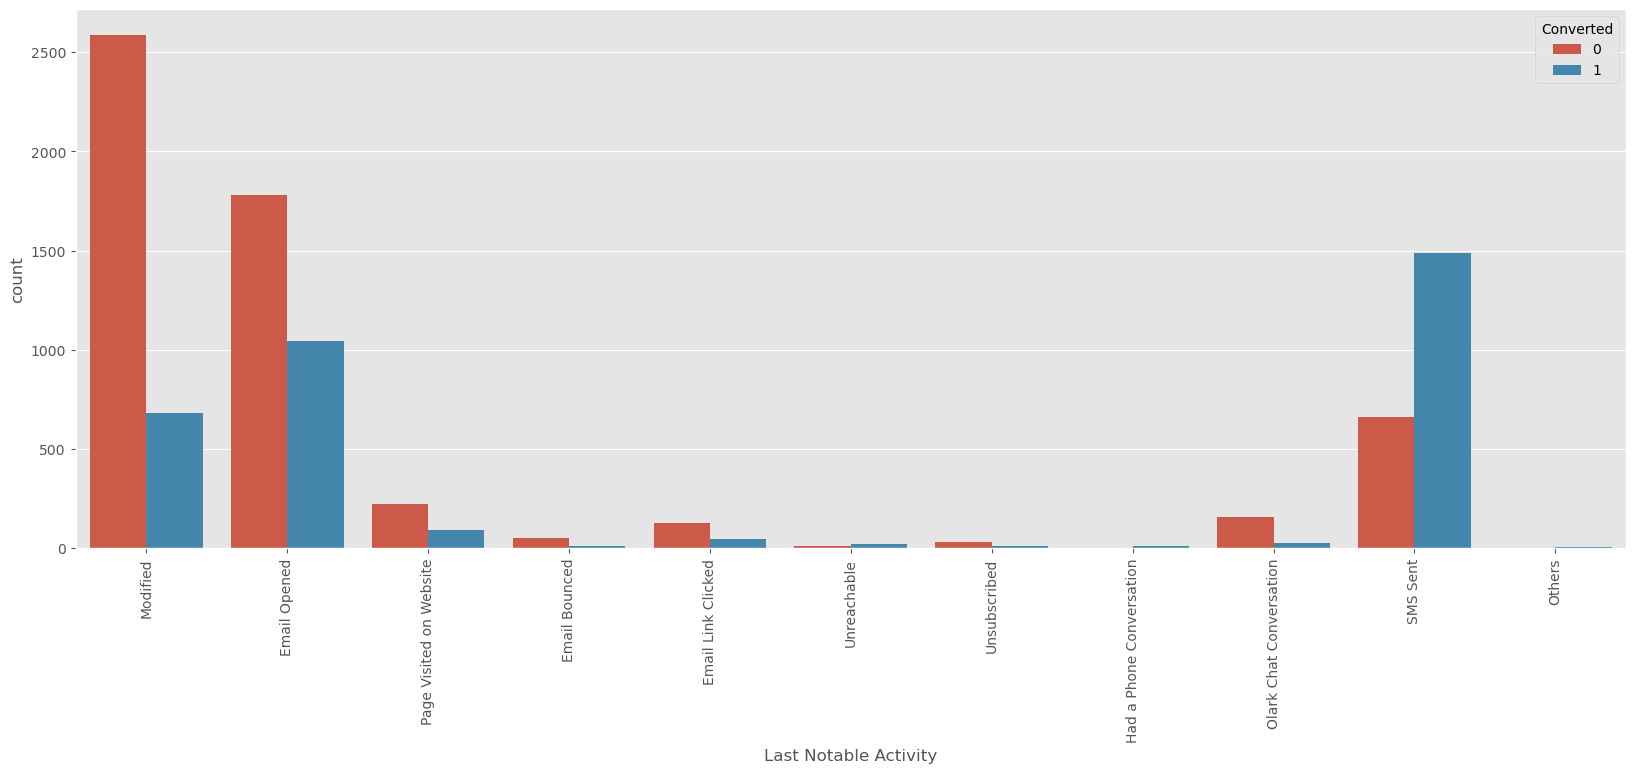

In [63]:
# Ploting new categories
plot_cat_var(cat_var[24])

### <font color = 'maroon'>Observations:</font>

Based on the data visualization, we can drop the variables which are not significant for analysis and will not add any significant information to the model.

In [64]:
leads_df = leads_df.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],1)


In [65]:
# Final DataFrame
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Unsure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [66]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

In [67]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


## <font color = 'red'>Step 4 : Data Preparation</font>

In [68]:
# Converting binary variable (Yes/No) to 0/1
leads_df['Do Not Email'] = leads_df['Do Not Email'].map({'Yes': 1, 'No': 0})

## Step 4.1 : Dummy Variable Creation

For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [69]:
# Categorical variables
cat_var = list(leads_df.columns[leads_df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [70]:
# To create dummy variables and drop first ones
dummy_var = pd.get_dummies(leads_df[cat_var], drop_first=True)

# To add result to the original dataframe
leads_df = pd.concat([leads_df, dummy_var], axis=1)

# To drop the original variables
leads_df = leads_df.drop(cat_var,1)

In [71]:
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Step 4.2 : Train-Test Split

In [72]:
# Importing the required package
from sklearn.model_selection import train_test_split

In [73]:
# To put feature variable to X
X = leads_df.drop(['Converted'],axis=1)
y = leads_df['Converted']

In [74]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 4.3 : Feature Scaling

In [75]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [78]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## <font color = 'red'>Step 5 : Model Building</font>

## Step 5.1 : Feature Selection Using RFE

In [79]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Facebook', False, 72),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 66),
 ('Lead Source_Others', False, 44),
 ('Lead Source_Reference', False, 71),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 74),
 ('Last Activity_Email Link Clicked', False, 51),
 ('Last Activity_Email Opened', False, 61),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Had a Phone Conversation', False, 20),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others', False, 38),
 ('Last Activity_Page Visited on Website', False, 52),
 ('Las

In [82]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Unsure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [83]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Sp

## Step 5.2 : Assessing the Model with StatsModels

In [84]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [86]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [87]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [88]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

## <font color = 'Green'>Model 1</font>

Running the first model by using the features selected by RFE approach

In [89]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.2
Date:                Thu, 21 Sep 2023   Deviance:                       2862.5
Time:                        14:52:39   Pearson chi2:                 1.96e+05
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5862
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### <font color = 'maroon'>Observations:</font>

"Tags_invalid number" has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

## <font color = 'Green'>Model 2</font>

In [90]:
col1 = col.drop('Tags_invalid number',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.5
Date:                Thu, 21 Sep 2023   Deviance:                       2884.9
Time:                        14:52:39   Pearson chi2:                 1.86e+05
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5847
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### <font color = 'maroon'>Observations:</font>

"Tags_number not provided" has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

## <font color = 'Green'>Model 3</font>

In [91]:
col2 = col1.drop('Tags_number not provided',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.8
Date:                Thu, 21 Sep 2023   Deviance:                       2895.6
Time:                        14:52:39   Pearson chi2:                 1.84e+05
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5840
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### <font color = 'maroon'>Observations:</font>

"Tags_wrong number given" has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

## <font color = 'Green'>Model 4</font>

In [92]:
col3 = col2.drop('Tags_wrong number given',1)

# Rebuild the model
X4, logm4 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1455.2
Date:                Thu, 21 Sep 2023   Deviance:                       2910.3
Time:                        14:52:39   Pearson chi2:                 1.81e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5831
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### <font color = 'maroon'>Observations:</font>

All of the features have p-value close to zero i.e. they all seem significant.

We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

In [93]:
check_VIF(X4)

,Features,VIF
7,Tags_Will revert after reading the email,2.70
9,Lead Quality_Unsure,2.44
11,Last Notable Activity_Modified,1.59
1,Lead Origin_Lead Add Form,1.57
3,Last Activity_SMS Sent,1.57
2,Lead Source_Welingak Website,1.35
6,Tags_Ringing,1.28
4,Tags_Closed by Horizzon,1.17
0,Do Not Email,1.12
10,Lead Quality_Worst,1.11


<AxesSubplot:>

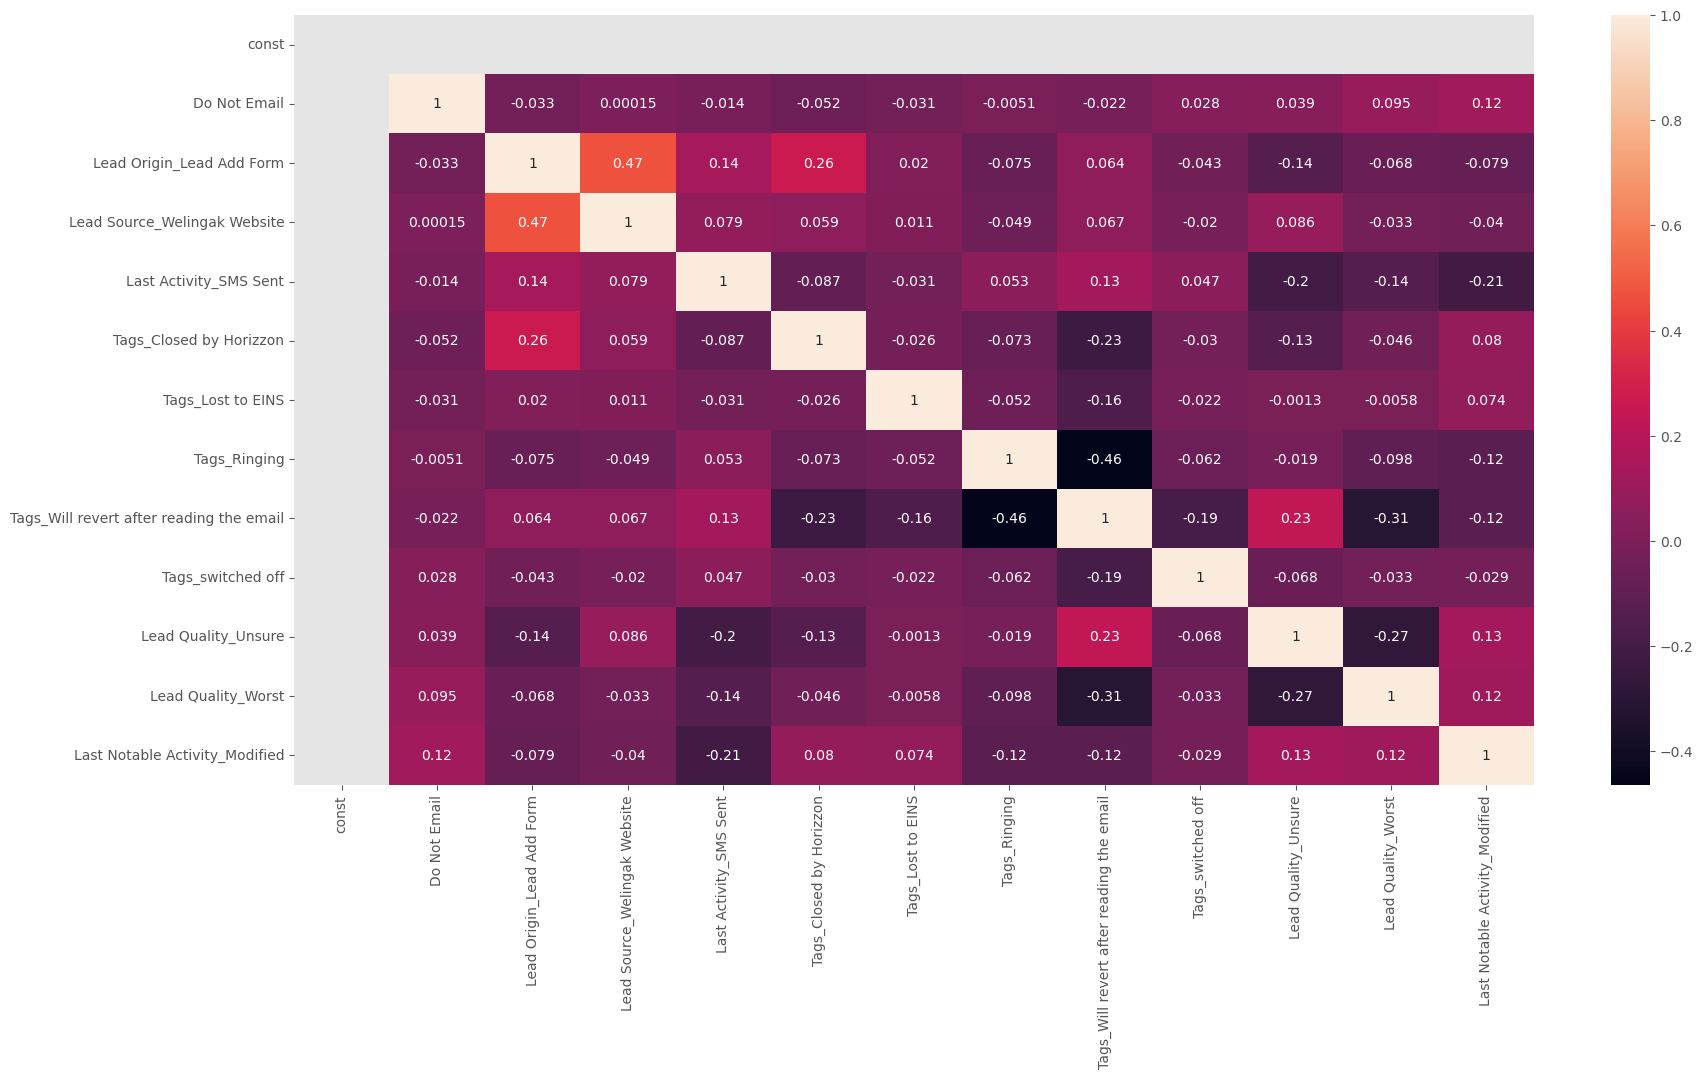

In [94]:
# Ploting correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

### <font color = 'maroon'>Observations:</font>

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [95]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.239230,3009,0
1,0,0.082565,1012,0
2,0,0.019446,9226,0
3,1,0.706189,4750,1
4,1,0.999889,7987,1


In [96]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3745  160]
 [ 340 2106]]
Training Accuracy:  0.9212722405920327


 | Predicted/Actual | Not converted Leads | Converted Leads |
    | --- | --- | --- |
    | Not converted Leads | 3745 | 160 |
    | Converted Leads | 340 | 2106 |

In [97]:
other_metrics(confusion)

Sensitivity:  0.8609975470155355
Specificity:  0.9590268886043534
False postive rate:  0.040973111395646605
Positive predictive value:  0.9293909973521624
Negative predictive value:  0.9167686658506732


### <font color = 'maroon'>This is our **final model**:</font>

1.  All p-values are very close to zero.
2.  VIFs for all features are very low. There is hardly any multicollinearity present.
3.  Training accuracy of 92.12% at a probability threshold of 0.05 is also very good.

## <font color = 'red'>Step 6 : Model Evaluation</font>

## Step 6.1 : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the trade off between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [98]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

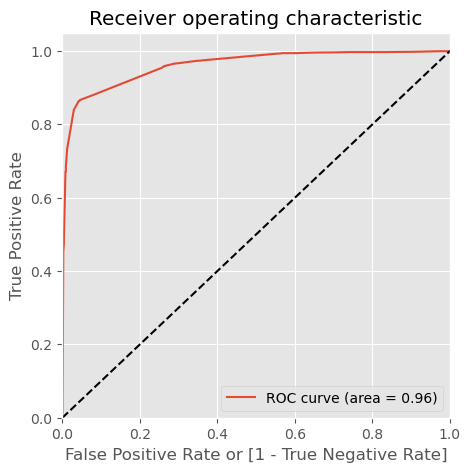

In [100]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [101]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9614573638216724


### <font color = 'maroon'>Observations:</font>

Area under curve (auc) is approximately 0.96 which is very close to ideal auc of 1.

## Step 6.2 : Finding Optimal Cutoff Point

Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [102]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.239230,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.082565,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.019446,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.706189,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.999889,7987,1,1,1,1,1,1,1,1,1,1,1


In [103]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs
cut_off_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.783184  0.971791  0.665045
0.2   0.2  0.822390  0.959117  0.736748
0.3   0.3  0.920485  0.866721  0.954161
0.4   0.4  0.921115  0.864677  0.956466
0.5   0.5  0.921272  0.860998  0.959027
0.6   0.6  0.921587  0.860998  0.959539
0.7   0.7  0.920013  0.839330  0.970551
0.8   0.8  0.873563  0.686018  0.991037
0.9   0.9  0.868682  0.671709  0.992061


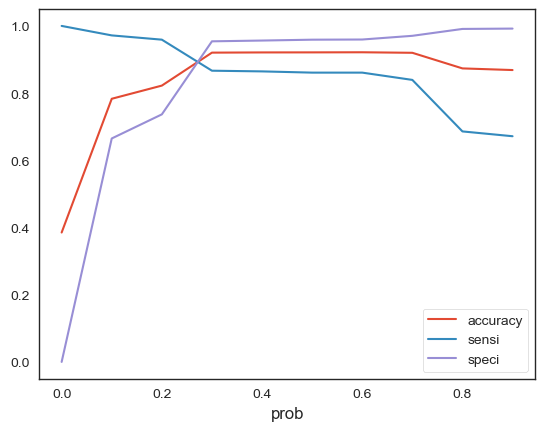

In [104]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cut_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### <font color = 'maroon'>Observations:</font>

From the above curve we observe that:

**0.25 is the optimum point to take as a cutoff probability**.

In [105]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.239230,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.082565,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.019446,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.706189,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.999889,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [106]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Lead ID','predicted','Lead_Score']].head()

,Converted,Converted_prob,Lead ID,predicted,Lead_Score
0,0,0.239230,3009,0,24
1,0,0.082565,1012,0,8
2,0,0.019446,9226,0,2
3,1,0.706189,4750,1,71
4,1,0.999889,7987,1,100


In [107]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','predicted']]
checking_df['predicted'].value_counts()

1    2106
0     340
Name: predicted, dtype: int64

In [108]:
# check the precentage of final_predicted conversions

2106/float(2106+340)

0.8609975470155355

### <font color = 'maroon'>Observations:</font>
Hence, we can observe from aboove that the final prediction of conversions have a target of 86%(approx) conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value, Negative Predictive Value on final prediction on train set

In [109]:
# Let's check the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.9058415997480712

In [110]:
# Checking Confusion matrix once again and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3602  303]
 [ 295 2151]]
Training Accuracy:  0.9058415997480712


In [111]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.8793949304987735
Specificity:  0.9224071702944943
False postive rate:  0.07759282970550577
Positive predictive value:  0.8765281173594132
Negative predictive value:  0.924300744162176


## Step 6.3 : Classification Report

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3905
           1       0.88      0.88      0.88      2446

    accuracy                           0.91      6351
   macro avg       0.90      0.90      0.90      6351
weighted avg       0.91      0.91      0.91      6351



## <font color = 'red'>Step 7 : Precision and Recall</font>

In [113]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9293909973521624

##### <font color = 'maroon'>Note:</font>

Recall = TP / TP + FN

In [114]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8609975470155355

In [115]:
#Using sklearn utilities for the same:
from sklearn.metrics import precision_score, recall_score

In [116]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9293909973521624

In [117]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8609975470155355

## Step 7.1 : Precision and Recall Tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

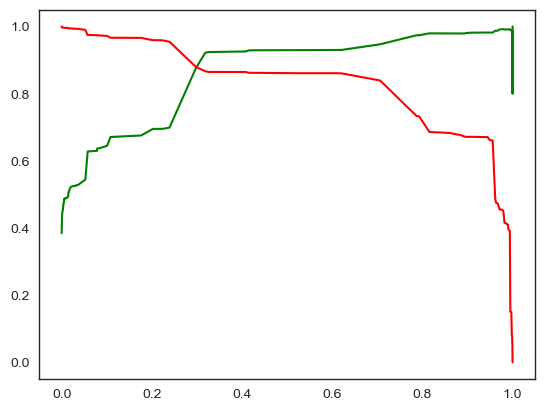

In [120]:
# Ploting precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### <font color = 'maroon'>Observations:</font>
From the above curve we can observe that :

0.25 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [121]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted_pr
0,0,0.239230,3009,0,1,1,1,0,0,0,0,0,0,0,0,24,0
1,0,0.082565,1012,0,1,0,0,0,0,0,0,0,0,0,0,8,0
2,0,0.019446,9226,0,1,0,0,0,0,0,0,0,0,0,0,2,0
3,1,0.706189,4750,1,1,1,1,1,1,1,1,1,0,0,1,71,1
4,1,0.999889,7987,1,1,1,1,1,1,1,1,1,1,1,1,100,1


In [122]:
# Creating 3rd Confusion matrix and checking overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3602  303]
 [ 295 2151]]
Training Accuracy:  0.9058415997480712


In [123]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.8793949304987735
Specificity:  0.9224071702944943
False postive rate:  0.07759282970550577
Positive predictive value:  0.8765281173594132
Negative predictive value:  0.924300744162176


### <font color = 'maroon'>Observations:</font>
Accuracy and other metrics yield similar values for both the cutoffs. Hence, We can use the cutoff of 0.25 as derived earlier for predictions on the test set.

## <font color = 'red'>Step 8 : Prediction on Test Set</font>

In [124]:
# Feature transform on Test set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,0,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [125]:
#Getting final features
X_test_sm = X_test[col3]

In [126]:
# Adding a constant
X_test_sm = sm.add_constant(X_test_sm)

# Making predictions
y_test_pred = logm4.predict(X_test_sm)

In [127]:
# Converting y_pred to a dataframe which is an array
y_pred1 = pd.DataFrame(y_test_pred)

y_pred1.head()

,0
3271,0.239230
1490,0.955897
7936,0.239230
4216,0.999154
3830,0.239230


In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side 
y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# To append y_test_df and y_pred_1
y_pred_final_df = pd.concat([y_test_df, y_pred1],axis=1)

# To Rename the column 
y_pred_final_df= y_pred_final_df.rename(columns={ 0 : 'Converted_prob'})

y_pred_final_df.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.239230
1,1,1490,0.955897
2,0,7936,0.239230
3,1,4216,0.999154
4,0,3830,0.239230


In [130]:
# To put the threshold of 0.2 as derived
y_pred_final_df['final_predicted'] = y_pred_final_df.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_pred_final_df.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.239230,0
1,1,1490,0.955897,1
2,0,7936,0.239230,0
3,1,4216,0.999154,1
4,0,3830,0.239230,0


In [131]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final_df.Converted, y_pred_final_df.Converted_prob))

Area under curve:  0.9506964148890389


In [132]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final_df.Converted,y_pred_final_df.final_predicted)

Confusion Matrix:
[[1594  140]
 [ 141  848]]
Training Accuracy:  0.8968049944913699


 | Predicted/Actual | Not converted Leads | Converted Leads |
    | --- | --- | --- |
    | Not converted Leads | 1594 | 140 |
    | Converted Leads | 141 | 848 |

In [133]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8574317492416582
Specificity:  0.9192618223760092
False postive rate:  0.08073817762399077
Positive predictive value:  0.8582995951417004
Negative predictive value:  0.9187319884726225


## Step 8.1 : Classification Report

In [134]:
print(classification_report(y_pred_final_df.Converted, y_pred_final_df.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1734
           1       0.86      0.86      0.86       989

    accuracy                           0.90      2723
   macro avg       0.89      0.89      0.89      2723
weighted avg       0.90      0.90      0.90      2723



## <font color = 'red'>Step 9 : Determining Feature Importance</font>

## Step 9.1 : Assigning Lead Score

Lead Score = 100 * Conversion Probability This needs to be calculated for all the leads from the original dataset (train + test).

In [135]:
# Selecting test set
leads_test_pred = y_pred_final_df.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.239230,0
1,1,1490,0.955897,1
2,0,7936,0.239230,0
3,1,4216,0.999154,1
4,0,3830,0.239230,0


In [136]:
# Selecting train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted_pr
0,0,0.239230,3009,0,1,1,1,0,0,0,0,0,0,0,0,24,0
1,0,0.082565,1012,0,1,0,0,0,0,0,0,0,0,0,0,8,0
2,0,0.019446,9226,0,1,0,0,0,0,0,0,0,0,0,0,2,0
3,1,0.706189,4750,1,1,1,1,1,1,1,1,1,0,0,1,71,1
4,1,0.999889,7987,1,1,1,1,1,1,1,1,1,1,1,1,100,1


In [137]:
# Drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()    

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.239230,0
1,1012,0,0.082565,0
2,9226,0,0.019446,0
3,4750,1,0.706189,1
4,7987,1,0.999889,1


In [138]:
# Concatenating 2 datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.239230,0
1,1012,0,0.082565,0
2,9226,0,0.019446,0
3,4750,1,0.706189,1
4,7987,1,0.999889,1


In [139]:
# Inspecting the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [140]:
# Ensuring uniqueness of Lead IDs
len(lead_full_pred['Lead ID'].unique().tolist())

9074

In [141]:
# Calculate the Lead Score
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.239230,0,24
1,1012,0,0.082565,0,8
2,9226,0,0.019446,0,2
3,4750,1,0.706189,1,71
4,7987,1,0.999889,1,100


In [142]:
# Making the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.036387,0,4
1,0,0.000213,0,0
2,1,0.955897,1,96
3,0,0.002588,0,0
4,1,0.792804,1,79


In [143]:
# Get Lead Number column from original data
leads_original = leads_df_original[['Lead Number']]
leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [144]:
# Concatenating the 2 dataframes based on index
leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.0,0.036387,0.0,4.0
1,660728,0.0,0.000213,0.0,0.0
2,660727,1.0,0.955897,1.0,96.0
3,660719,0.0,0.002588,0.0,0.0
4,660681,1.0,0.792804,1.0,79.0


In [145]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Do Not Email                               -1.25
Lead Origin_Lead Add Form                   0.82
Lead Source_Welingak Website                3.56
Last Activity_SMS Sent                      2.03
Tags_Closed by Horizzon                     9.53
Tags_Lost to EINS                          10.35
Tags_Ringing                               -2.68
Tags_Will revert after reading the email    4.62
Tags_switched off                          -2.95
Lead Quality_Unsure                        -4.23
Lead Quality_Worst                         -3.80
Last Notable Activity_Modified             -1.73
dtype: float64

In [146]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -12.08
Lead Origin_Lead Add Form                    7.89
Lead Source_Welingak Website                34.41
Last Activity_SMS Sent                      19.65
Tags_Closed by Horizzon                     92.09
Tags_Lost to EINS                          100.00
Tags_Ringing                               -25.87
Tags_Will revert after reading the email    44.61
Tags_switched off                          -28.53
Lead Quality_Unsure                        -40.89
Lead Quality_Worst                         -36.69
Last Notable Activity_Modified             -16.75
dtype: float64

In [147]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                 9
Lead Origin_Lead Add Form                   10
Lead Source_Welingak Website                 8
Last Activity_SMS Sent                       6
Tags_Closed by Horizzon                     11
Tags_Lost to EINS                            0
Tags_Ringing                                 1
Tags_Will revert after reading the email     3
Tags_switched off                            2
Lead Quality_Unsure                          7
Lead Quality_Worst                           4
Last Notable Activity_Modified               5
dtype: int64

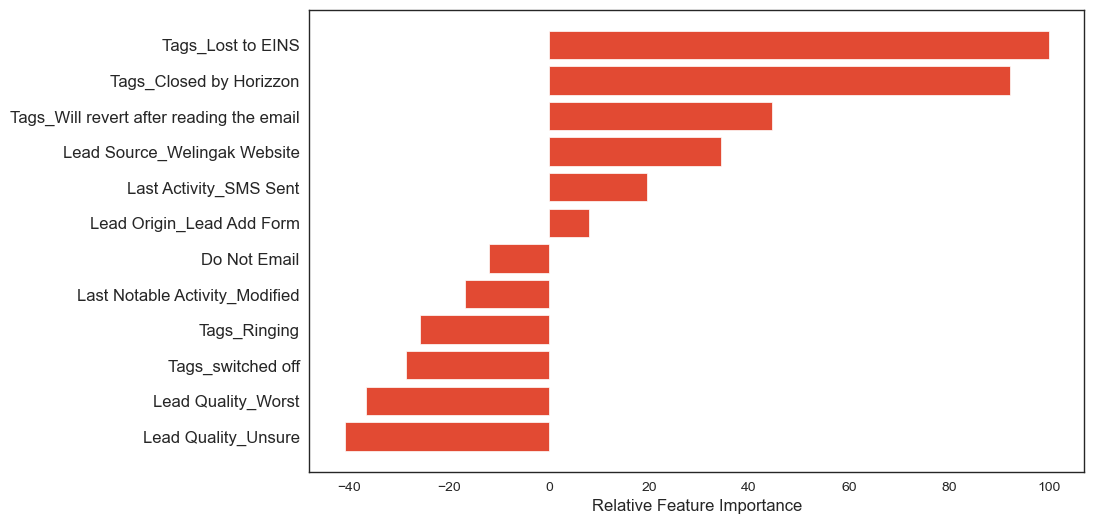

In [148]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

### <b><font color = 'maroon'>Conclusions Drawn: </font></b>

After building several models, our final model has the following characteristics:  
1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. The overall testing accuracy of 89.68% at a probability threshold of 0.08 which is also very good.

| Dataset | Accuracy | Sensitivity | Specificity | False Positive Rate | Positive Predictive Rate | Negative Predictive Value | AUC |
| ------- | -------- | ----------- | ----------- | ------------------ | ----------------------- | ------------------------ | --- |
| Train   | 0.8223   | 0.9591      | 0.7367      | 0.0775             | 0.8765                  | 0.9243                   | 0.9614 |
    | Test    | 0.8968   | 0.8574      | 0.9192      | 0.0807             | 0.8582                  | 0.9187                   | 0.9506 |

-High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted. 

-The **optimal threshold** for the model is **0.25** which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.  


**Twelve features** were selected as the most significant in predicting the conversion:  

- Features having negative impact on conversion probability in decreasing order of impact:  

    |**Features with Negative Coefficient Values**|
    |-|
    |Lead Quality_Worst|
    |Lead Quality_Not Sure|
    |Tags_switched off|
    |Tags_Ringing|
    |Do Not Email|
    
    
- Features having positive impact on conversion probability in decreasing order of impact:  
    |**Features with Positive Coefficient Values**|
    |-|
    |Tags_Lost to EINS|
    |Tags_Closed by Horizzon|
    |Tags_Will revert after reading the email|
    |Tags_Busy|
    |Lead Source_Welingak Website|
    |Last Notable Activity_SMS Sent|
    |Lead Origin_Lead Add Form|
    